In [103]:
import json
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from utils.evaluation.jsonEncoder import NpEncoder
def get_from_json(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
    return data
SAVE = get_from_json("./Figure/BoxPlots/Result.json")
SAVE = get_from_json("./Figure/BoxPlots/ResultNew.json")
SAVE = get_from_json("./Figure/BoxPlots/ResultNew1.json")

# Centrality Feature

## ER Model

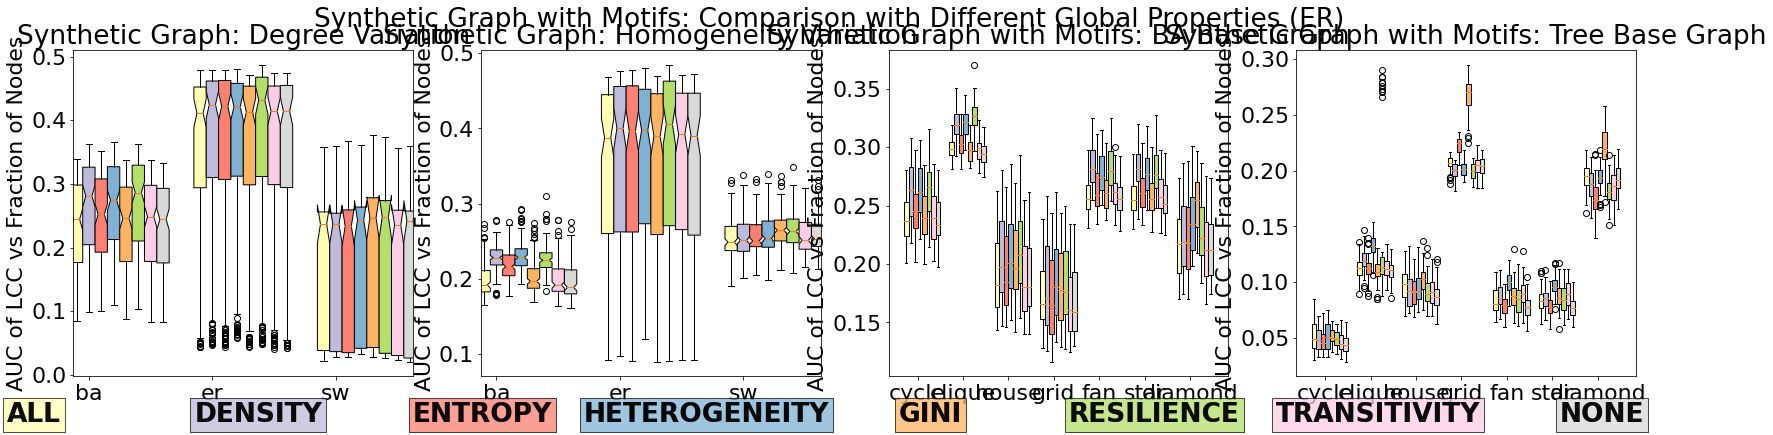

In [48]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['er', 'Density_er', 'Entropy_er', 'Heterogeneity_er','Gini_er','Resilience_er', 'Transitivity_er', 'None_er']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (ER)")
plt.savefig("./Figure/BoxPlots/ER_GlobalFeature.pdf")
plt.show()

## SW Model

In [ ]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['sw', 'Density_sw', 'Entropy_sw', 'Heterogeneity_sw','Gini_sw','Resilience_sw', 'Transitivity_sw', 'None_ba']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (SW)")
plt.savefig("./Figure/BoxPlots/SW_GlobalFeature.pdf")
plt.show()

## BA Model

In [ ]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['Best','All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#8dd3c7', '#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['ba','All_ba', 'Density_ba', 'Entropy_ba', 'Heterogeneity_ba','Gini_ba','Resilience_ba', 'Transitivity_ba', 'None_ba']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (BA)")
plt.savefig("./Figure/BoxPlots/BA_GlobalFeature.pdf")
plt.show()

## Mix Model

In [ ]:
color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini' ,'Resilience','Transitivity', 'None']
model_name = ['mix', 'Density_mix', 'Entropy_mix', 'Heterogeneity_mix','Gini_mix','Resilience_mix', 'Transitivity_mix', 'None_mix']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (Mix)")
plt.savefig("./Figure/BoxPlots/Mix_GlobalFeature.pdf")
plt.show()

## Small World Model

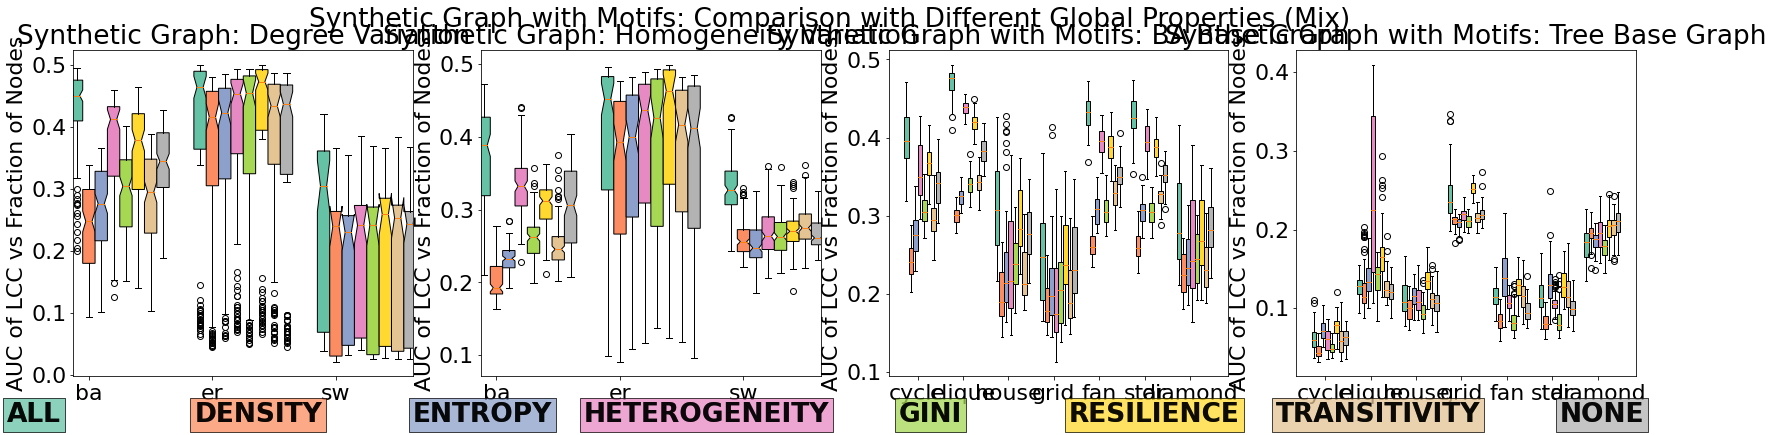

In [102]:
color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini' ,'Resilience','Transitivity', 'None']
model_name = ['sw', 'Density_sw', 'Entropy_sw', 'Heterogeneity_sw','Gini_sw','Resilience_sw', 'Transitivity_sw', 'None_sw']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (Mix)")
plt.savefig("./Figure/BoxPlots/Mix_GlobalFeature.pdf")
plt.show()

# Compare State of the Art

In [101]:
import matplotlib
def boxplot_appeal(bp):
    for flier in bp['fliers']:    # outliers
        flier.set_markersize(4)
        flier.set_marker('o')
    for box in bp['boxes']:     # box bodys
        '''box.set_facecolor('green')
        box.set_edgecolor('black')'''
        box.set_linewidth(1)
    for whisker in bp['whiskers']:   # whisker line
        whisker.set_linewidth(2)
    for cap in bp['caps']:     # cap line
        cap.set_color('red')
        cap.set_linewidth(4)
    for median in bp['medians']:   # median line
        median.set_linewidth(3)
def plot_boxplot_single(SAVE,model_name,method, labeling,color,obj,measure='auc'):
    fig, ax = plt.subplots(figsize=(20, 10), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
    font = {'weight' : 'normal',
        'size'   : 22}
    matplotlib.rc('font', **font)
    n_models = len(labeling)
    shift = 1 / (n_models + 1)
    handles = []
    for color_code, model in enumerate(model_name):
        if method == "result_Syn":
            result = SAVE[model][method]
            data = {"ba":[], 
                "er":[], 
                "sw":[]}
            for pos,evalType in enumerate(['Degree','Homogeneity']):
                #for pos,evalType in enumerate(['Degree']):
                data['ba'] = data['ba'] + result[evalType]["barabasi"][measure]
                data['er'] = data['er'] + result[evalType]["erdos"][measure]
                data['sw'] =  data['sw'] + result[evalType]["small-world"][measure]
            for position,key in enumerate(data):
                #bp = ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                for pc in bp["bodies"]:
                    pc.set_facecolor(color[color_code])
                    pc.set_edgecolor(color[color_code])
                    pc.set_linewidth(1.5)
                    pc.set_alpha(0.5)
                '''boxplot_appeal(bp)'''
                if position == 0:
                    #handles.append(bp["boxes"][0])
                    handles.append(bp["bodies"][0])
            if measure == 'auc':
                ax.set_ylabel('AUC of (Objective function vs Nodes Removed)')
            else:
                ax.set_ylabel('Fraction of Nodes Removed')
            ax.title.set_text("Synthetic Graph")
            ax.set_xticks(np.arange(0, len(data))*20)
            ax.set_xticklabels(data.keys())
        else:
            result = SAVE[model][method]
            data = {"cycle":[], 
                    "clique":[],
                    "house":[], 
                    "grid":[],
                    "fan":[],
                    "star":[],
                    "diamond":[]}
            for pos,evalType in enumerate(['BA','Tree']):
                data["cycle"] = data["cycle"] + result[evalType]["cycle"][measure][0:]
                data["clique"] = data["clique"] + result[evalType]["clique"][measure]
                data["house"] = data["house"] + result[evalType]["house"][measure]
                data["grid"] = data["grid"] + result[evalType]["grid"][measure]
                data["fan"] = data["fan"] + result[evalType]["fan"][measure]
                data["star"] = data["star"] + result[evalType]["star"][measure]
                data["diamond"] = data["diamond"] + result[evalType]["diamond"][measure]

            for position,key in enumerate(data):
                bp = ax.violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                for pc in bp["bodies"]:
                    pc.set_facecolor(color[color_code])
                    pc.set_edgecolor(color[color_code])
                    pc.set_linewidth(1.5)
                    pc.set_alpha(0.5)
                if pos == 0 and position == 0:
                    handles.append(bp["bodies"][0])
                    #handles.append(bp["boxes"][0])
                if measure == 'auc':
                    ax.set_ylabel('AUC of (Objective function vs Nodes Removed)')
                else:
                    ax.set_ylabel('Fraction of Nodes Removed')
                ax.title.set_text("Synthetic Graph with Motifs")
                ax.set_xticks(np.arange(0, len(data))*20)
                ax.set_xticklabels(data.keys())
        x = (color_code + 1) * shift - shift / 2
    fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
    plt.savefig("./Figure/BoxPlots/Combine:"+obj+"_"+method+"_"+measure.upper()+".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
def plot_boxplot(SAVE,model_name,method, labeling,color,obj,measure='auc'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
    font = {'weight' : 'normal',
        'size'   : 22}
    matplotlib.rc('font', **font)
    n_models = len(labeling)
    shift = 1 / (n_models + 1)
    handles = []
    for color_code, model in enumerate(model_name):
        if method == "result_Syn":
            for pos,evalType in enumerate(['Degree','Homogeneity']):
                #for pos,evalType in enumerate(['Degree']):
                result = SAVE[model][method]
                data = {"ba":result[evalType]["barabasi"][measure], 
                "er":result[evalType]["erdos"][measure][0:88], 
                "sw":result[evalType]["small-world"][measure]}
                for position,key in enumerate(data):
                    #bp = ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                    bp = ax[pos].violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                    for pc in bp["bodies"]:
                        pc.set_facecolor(color[color_code])
                        pc.set_edgecolor(color[color_code])
                        pc.set_linewidth(1.5)
                        pc.set_alpha(0.5)
                    '''boxplot_appeal(bp)'''
                    if pos == 0 and position == 0:
                        #handles.append(bp["boxes"][0])
                        handles.append(bp["bodies"][0])
                if measure == 'auc':
                    ax[pos].set_ylabel('AUC of (Objective function vs Nodes Removed)')
                else:
                    ax[pos].set_ylabel('Fraction of Nodes Removed')
                ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                ax[pos].set_xticks(np.arange(0, len(data))*20)
                ax[pos].set_xticklabels(data.keys())
        else:
            for pos,evalType in enumerate(['BA','Tree']):
                #for pos,evalType in enumerate(['BA']):
                #pos +=1
                #pos +=2
                result = SAVE[model][method]
                data = {"cycle":result[evalType]["cycle"][measure], 
                            "clique":result[evalType]["clique"][measure][0:36],
                            "house":result[evalType]["house"][measure], 
                            "grid":result[evalType]["grid"][measure],
                            "fan":result[evalType]["fan"][measure],
                            "star":result[evalType]["star"][measure],
                            "diamond":result[evalType]["diamond"][measure]}
                for position,key in enumerate(data):
                    bp = ax[pos].violinplot(data[key],  positions=[-5+position*20+color_code*2],showmeans=True, widths=2)
                    for pc in bp["bodies"]:
                        pc.set_facecolor(color[color_code])
                        pc.set_edgecolor(color[color_code])
                        pc.set_linewidth(1.5)
                        pc.set_alpha(0.5)
                    if pos == 0 and position == 0:
                        handles.append(bp["bodies"][0])
                        #handles.append(bp["boxes"][0])
                    if measure == 'auc':
                        ax[pos].set_ylabel('AUC of (Objective function vs Nodes Removed)')
                    else:
                        ax[pos].set_ylabel('Fraction of Nodes Removed')
                    ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
        x = (color_code + 1) * shift - shift / 2
        #fig.text(x+0.075, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
    #ax[-1].legend(handles,labeling,loc="upper left", fontsize=24, bbox_to_anchor=(1,1))
    #ax[0].legend(handles,labeling,loc="lower left", fontsize=24, mode = "expand", ncol = len(labeling))
    fig.legend(handles, labeling,loc = "lower left", bbox_to_anchor=(0, -0.1,1 ,1 ),  fontsize=24, mode = "expand", ncol = len(labeling))
    plt.savefig("./Figure/BoxPlots/"+obj+"_"+method+"_"+measure.upper()+".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()

#plot_barplot(SAVE,model_name, labeling,color,measure='auc')
def plot_bargraph(SAVE,model_name, method, labeling,color, objectiveFunction,measure='auc'):
    if method == "result_Syn":
        data = {"Degree": {"ba":[], "er":[],"sw":[]},"Homogeneity": {"ba":[], "er":[],"sw":[]}}   
        cond = True
        title = "Synthetic Graph"
        save = "syn"
    elif method == "result_SynMotif":
        data = {"BA": {"cycle":[],"clique":[],"house":[],"grid":[],"fan":[],"star":[],"diamond":[]},
                "Tree": {"cycle":[],"clique":[],"house":[],"grid":[],"fan":[],"star":[],"diamond":[]}}
        cond = False
        title = "Synthetic Graph with Motifs Attached"
        save = "synMotif"
    for color_code, model in enumerate(model_name):
        if cond:
            #evalType =(['Degree','Homogeneity']):
            for evalType in data:
                result = SAVE[model][method]
                # ER limited to only 88 since finder only had data for 88 graph
                data[evalType]["ba"].append(sum(result[evalType]["barabasi"][measure]))
                data[evalType]["er"].append(sum(result[evalType]["erdos"][measure]))
                data[evalType]["sw"].append(sum(result[evalType]["small-world"][measure]))
        else:
            #for evalType =(['BA','Tree']):
            for evalType in data:
                result = SAVE[model][method]
                # cycle motifs limited to only 36 since finder only had data for 36 graph
                data[evalType]["cycle"].append(sum(result[evalType]["cycle"][measure]))
                data[evalType]["clique"].append(sum(result[evalType]["clique"][measure]))
                data[evalType]["house"].append(sum(result[evalType]["house"][measure]))
                data[evalType]["grid"].append(sum(result[evalType]["grid"][measure]))
                data[evalType]["fan"].append(sum(result[evalType]["fan"][measure]))
                data[evalType]["star"].append(sum(result[evalType]["star"][measure]))
                data[evalType]["diamond"].append(sum(result[evalType]["diamond"][measure]))
    # these are models => BA, MIX, CI, FINDER
    model = tuple(model_name)
    width = 0.25
    fig, ax = plt.subplots(figsize=(18, 12), dpi=100, constrained_layout=True,gridspec_kw={'wspace':0.1,'hspace':0.1})
    font = {'weight' : 'normal',
        'size'   : 22}
    matplotlib.rc('font', **font)
    x = np.arange(len(model)) 
    multiplier = 0
    bar_label = list(data.keys())*len(model)
    def autolabel(rects, title, cond):
        for rect in rects:
            h = rect.get_height()
            if cond:
                ax.text(rect.get_x()+rect.get_width()/2., 5, title,
                    ha='center', va='bottom',rotation="vertical",fontweight="heavy",fontsize="large")
            else:
                ax.text(rect.get_x()+rect.get_width()/2., rect.get_y()+h+3.5, title,
                    ha='center', va='bottom',weight="heavy")
    for i, (attribute, measurement) in enumerate(data.items()): 
        #bar_label = [attribute]*len(model)
        bottom = np.zeros(len(model))
        offset = width * multiplier
        for j, (boolean, dataType) in enumerate(measurement.items()):
            if i == 0:
                p = ax.bar(x+offset, dataType, width,color = color[j], label=boolean, edgecolor = "black", bottom=bottom,linewidth=2)
            else:
                p = ax.bar(x+offset, dataType, width, color= color[j], edgecolor = "black", bottom=bottom,linewidth=2)
            bottom += dataType
        autolabel(p,attribute,True)
        multiplier += 1
        ax.bar_label(p, padding=3, fontsize=22, fontweight="heavy",fmt="%3.2f")
        #ax.bar_label(p,labels=bar_label, padding=3, fontsize=12)
    labeling= [l.upper() for l in labeling]
    ax.set_xticks(x + width/2, labeling)
    ax.set_title(objectiveFunction+ ": Evalution of models on "+ title, fontsize=32)
    ax.legend(loc="upper left", fontsize=24, bbox_to_anchor=(1,1))
    plt.ylabel("AUC of (Objective function vs Nodes Removed) plot", fontsize=26)
    plt.savefig("./Figure/BarGraph/"+objectiveFunction+"_"+save+".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()


# Largest Connected Components

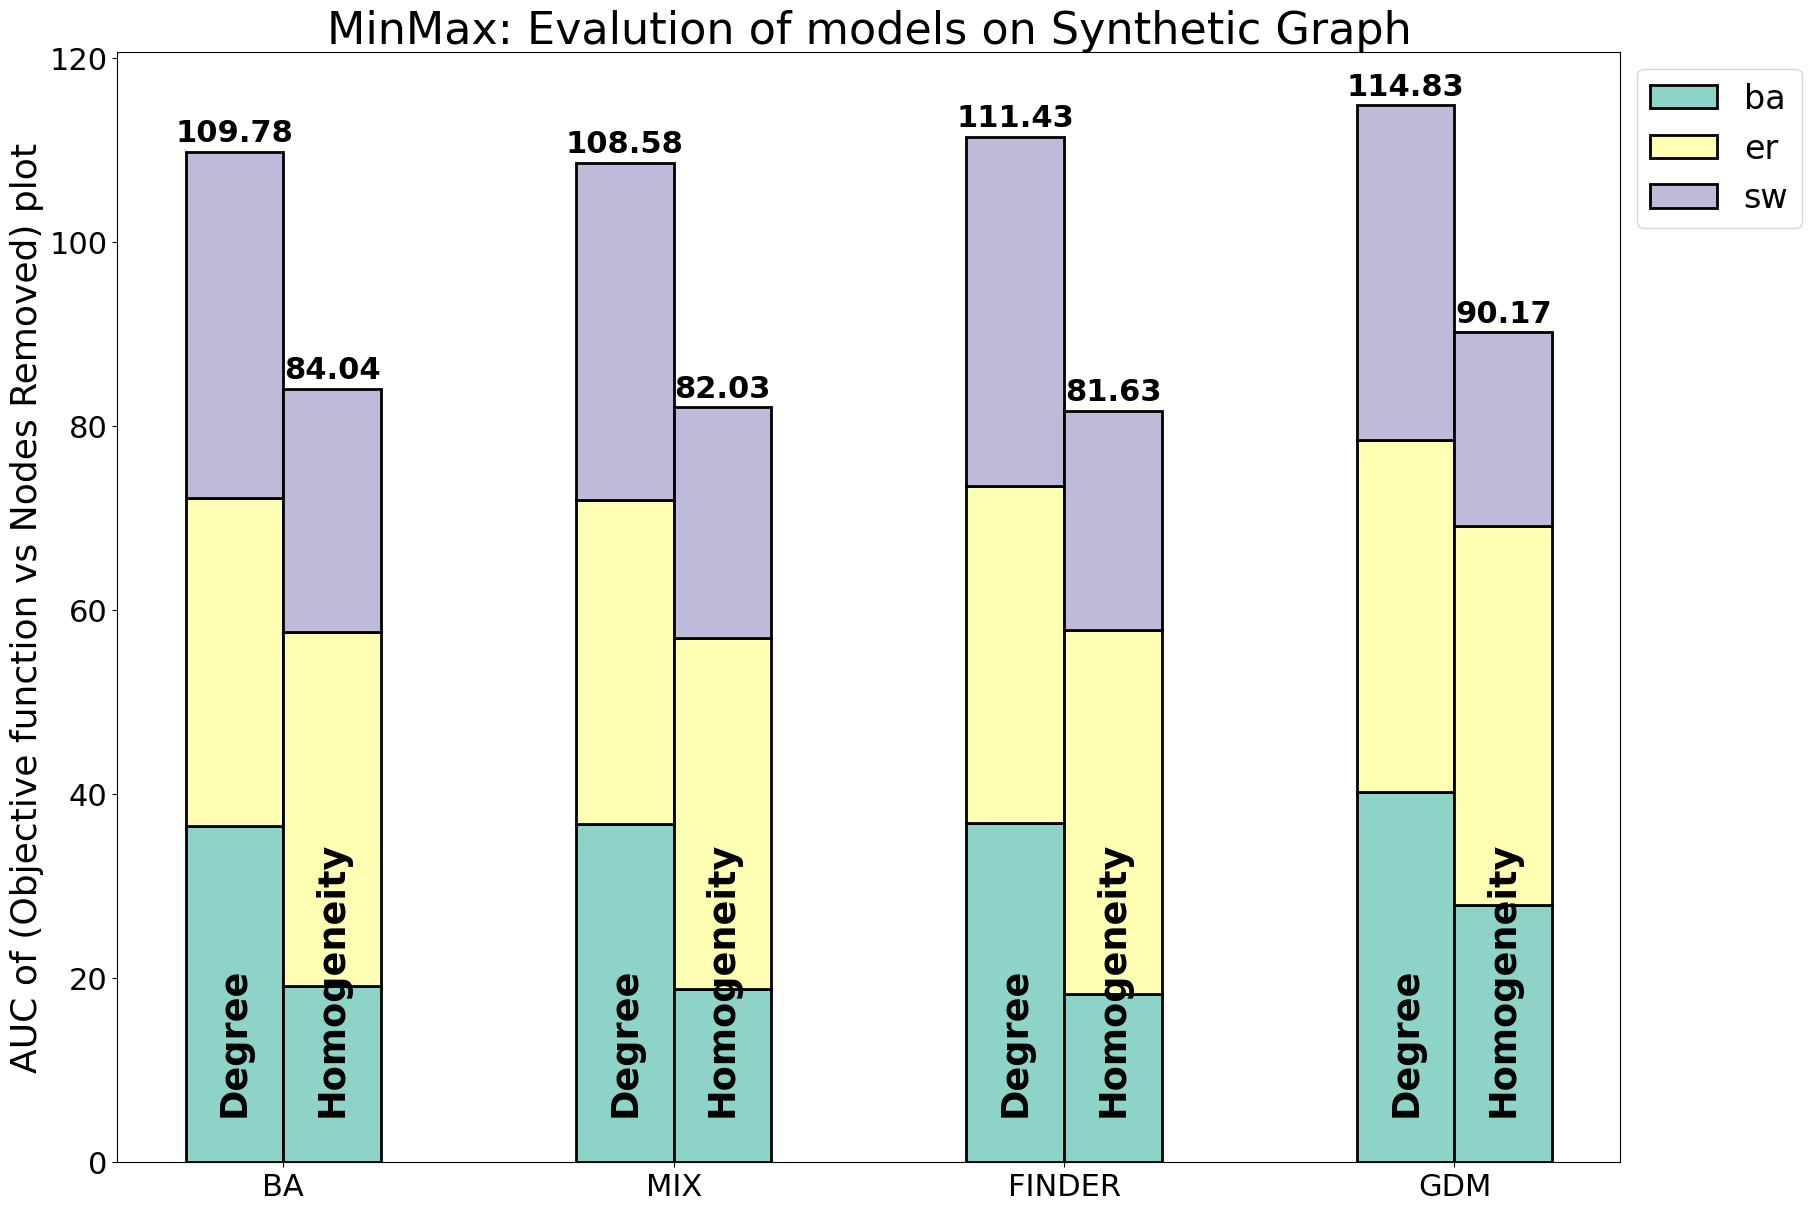

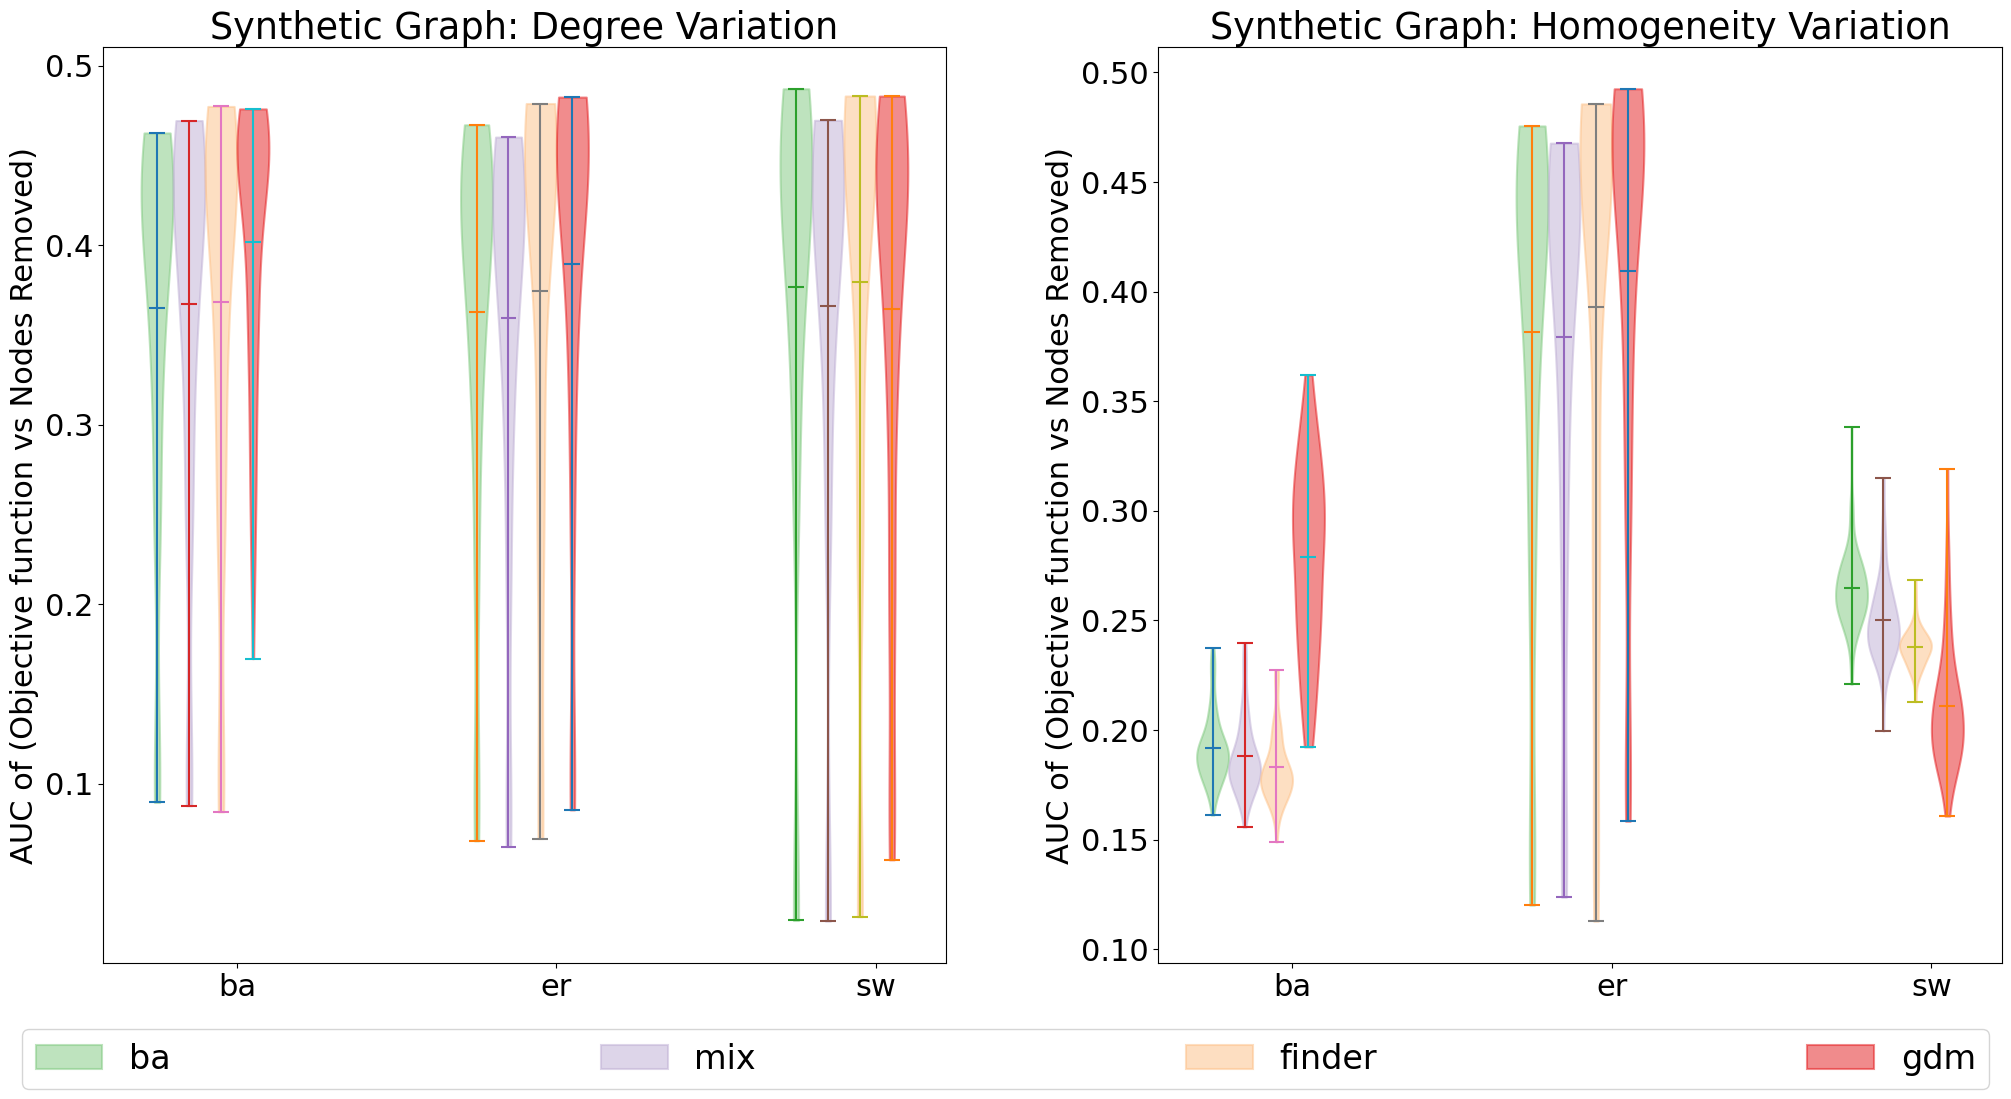

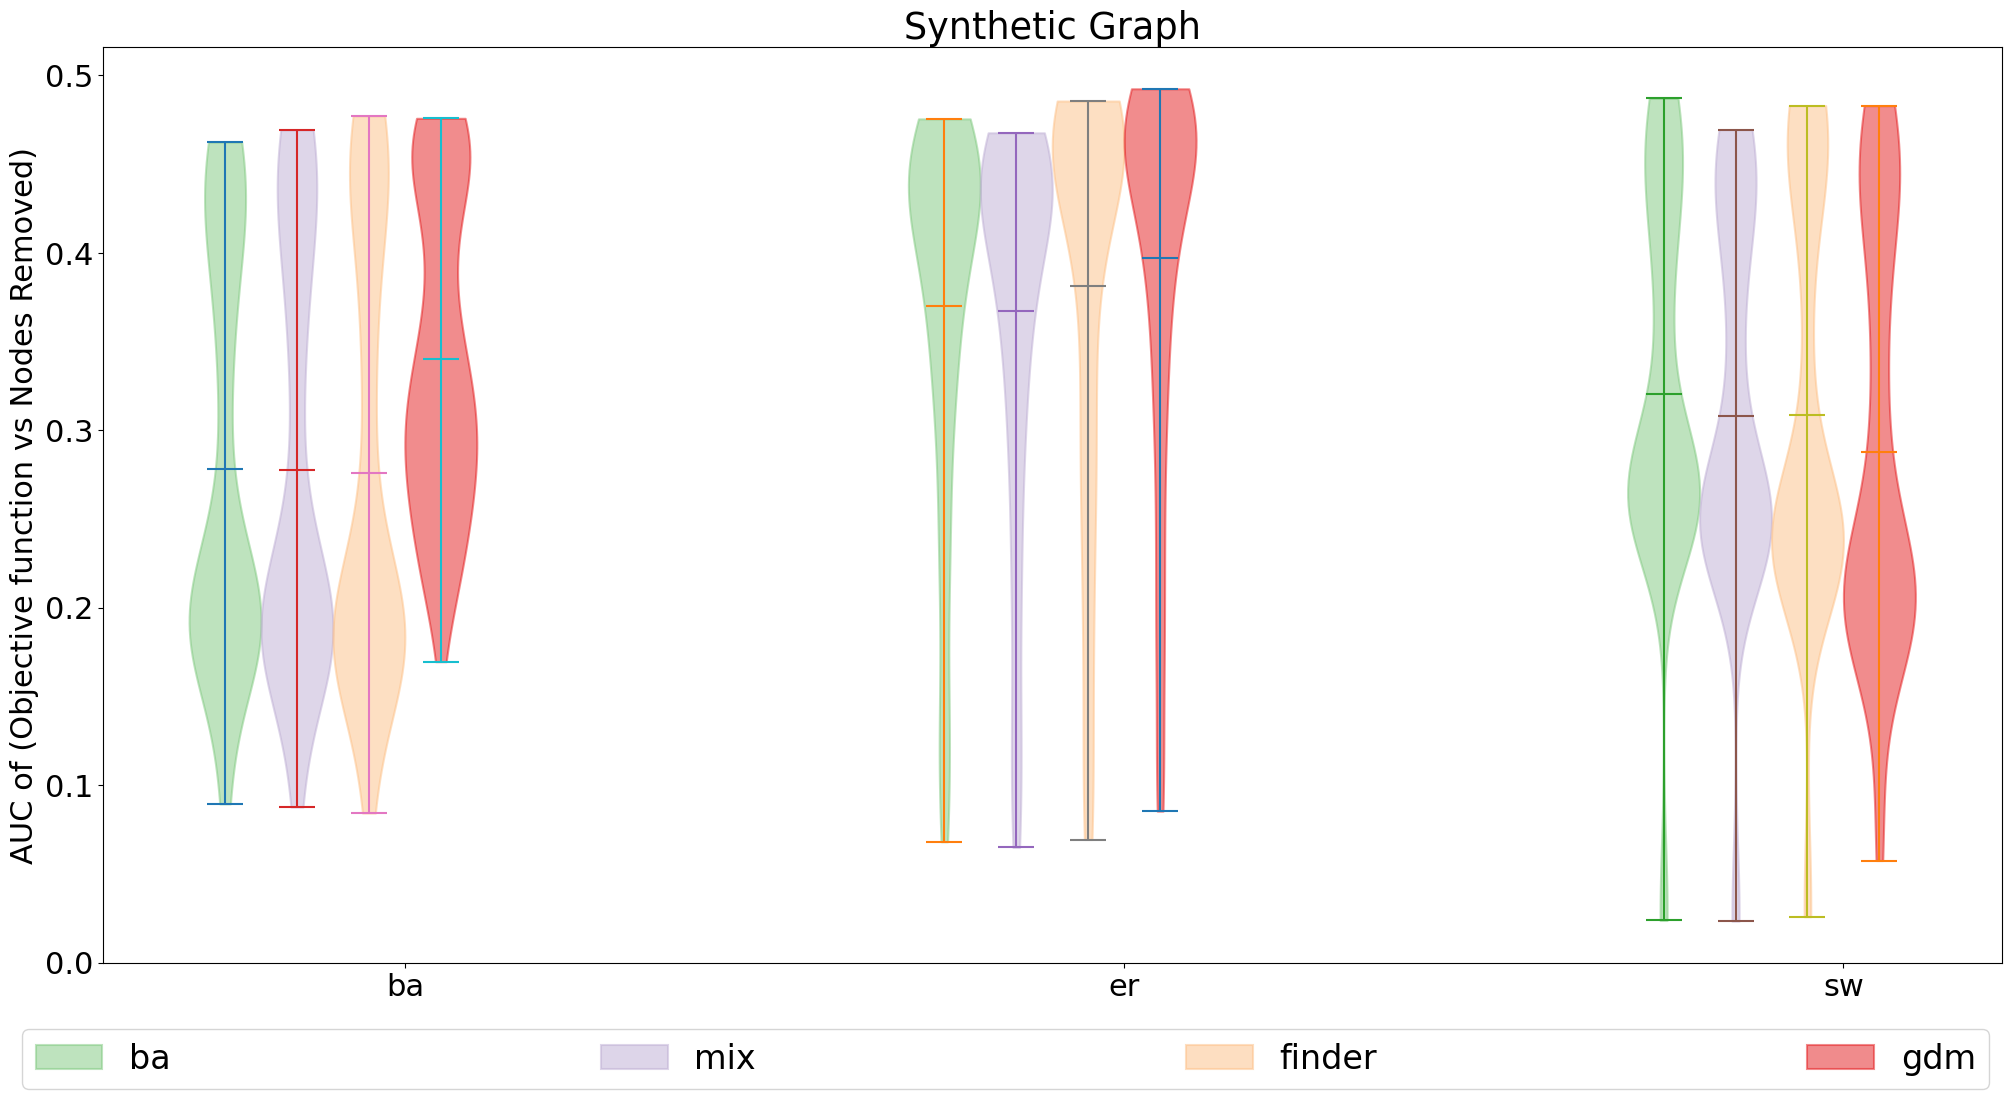

In [100]:
color_1 = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
color_2 = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
color_2 = ['#7fc97f','#beaed4','#fdc086','#e41a1c','#386cb0','#f0027f']
labeling = ['ba', 'mix', 'finder', 'gdm','ci','corehd']
labeling = ['ba', 'mix', 'finder', 'gdm']
measure = 'auc'
#measure = 'fraction'
#model_name = ['ba', 'mix', 'finder','gdm','ci','corehd']  
#model_name = ['ba', 'mix', 'finder','gdm','ci','corehd_new']  
model_name = ['ba', 'mix', 'finder','gdm']  
objectiveFunction = 'MinMax'
#for evaluation_method in ["result_Syn", "result_SynMotif"]:
for evaluation_method in ["result_Syn"]:
    plot_bargraph(SAVE,model_name, evaluation_method, labeling,color_1,objectiveFunction,measure)
    plot_boxplot(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    plot_boxplot_single(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')


# Pairwise Connectivity

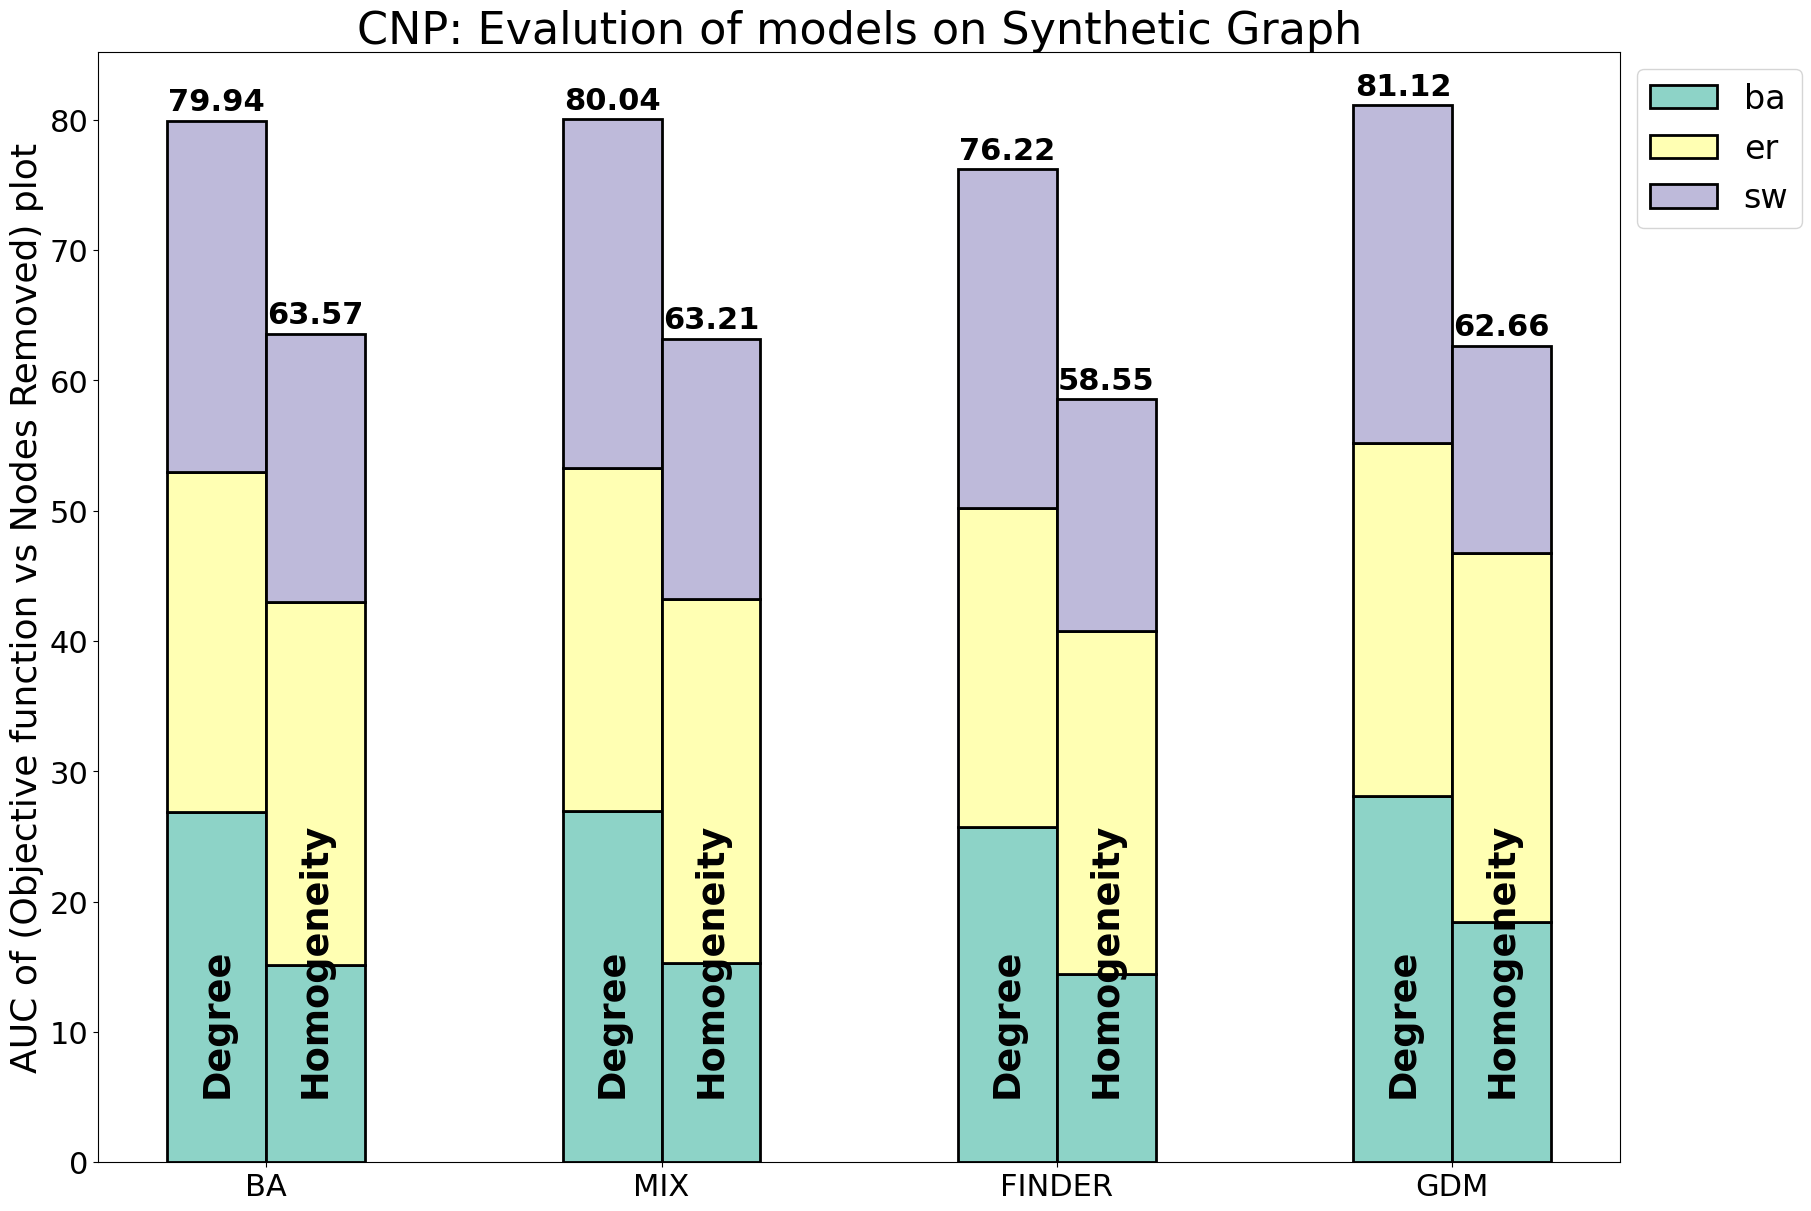

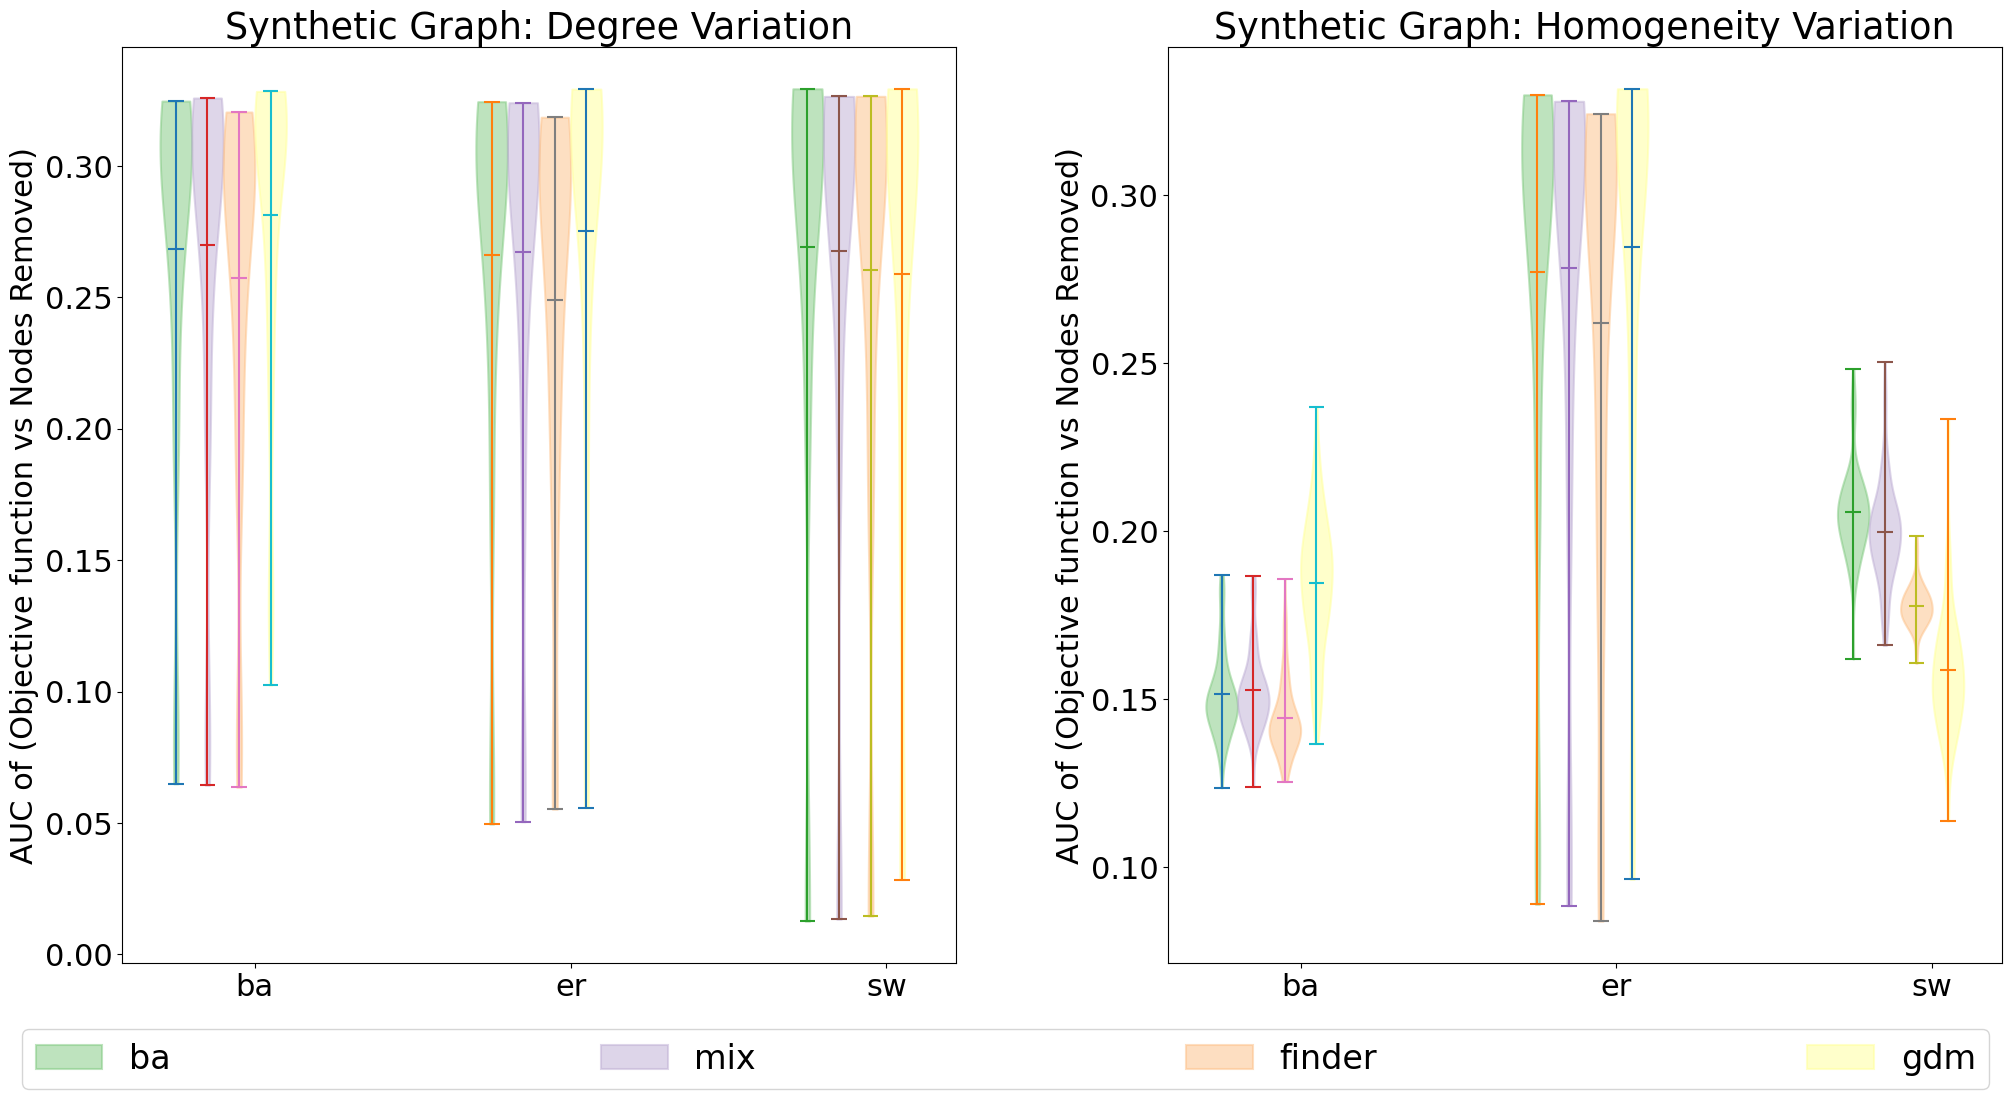

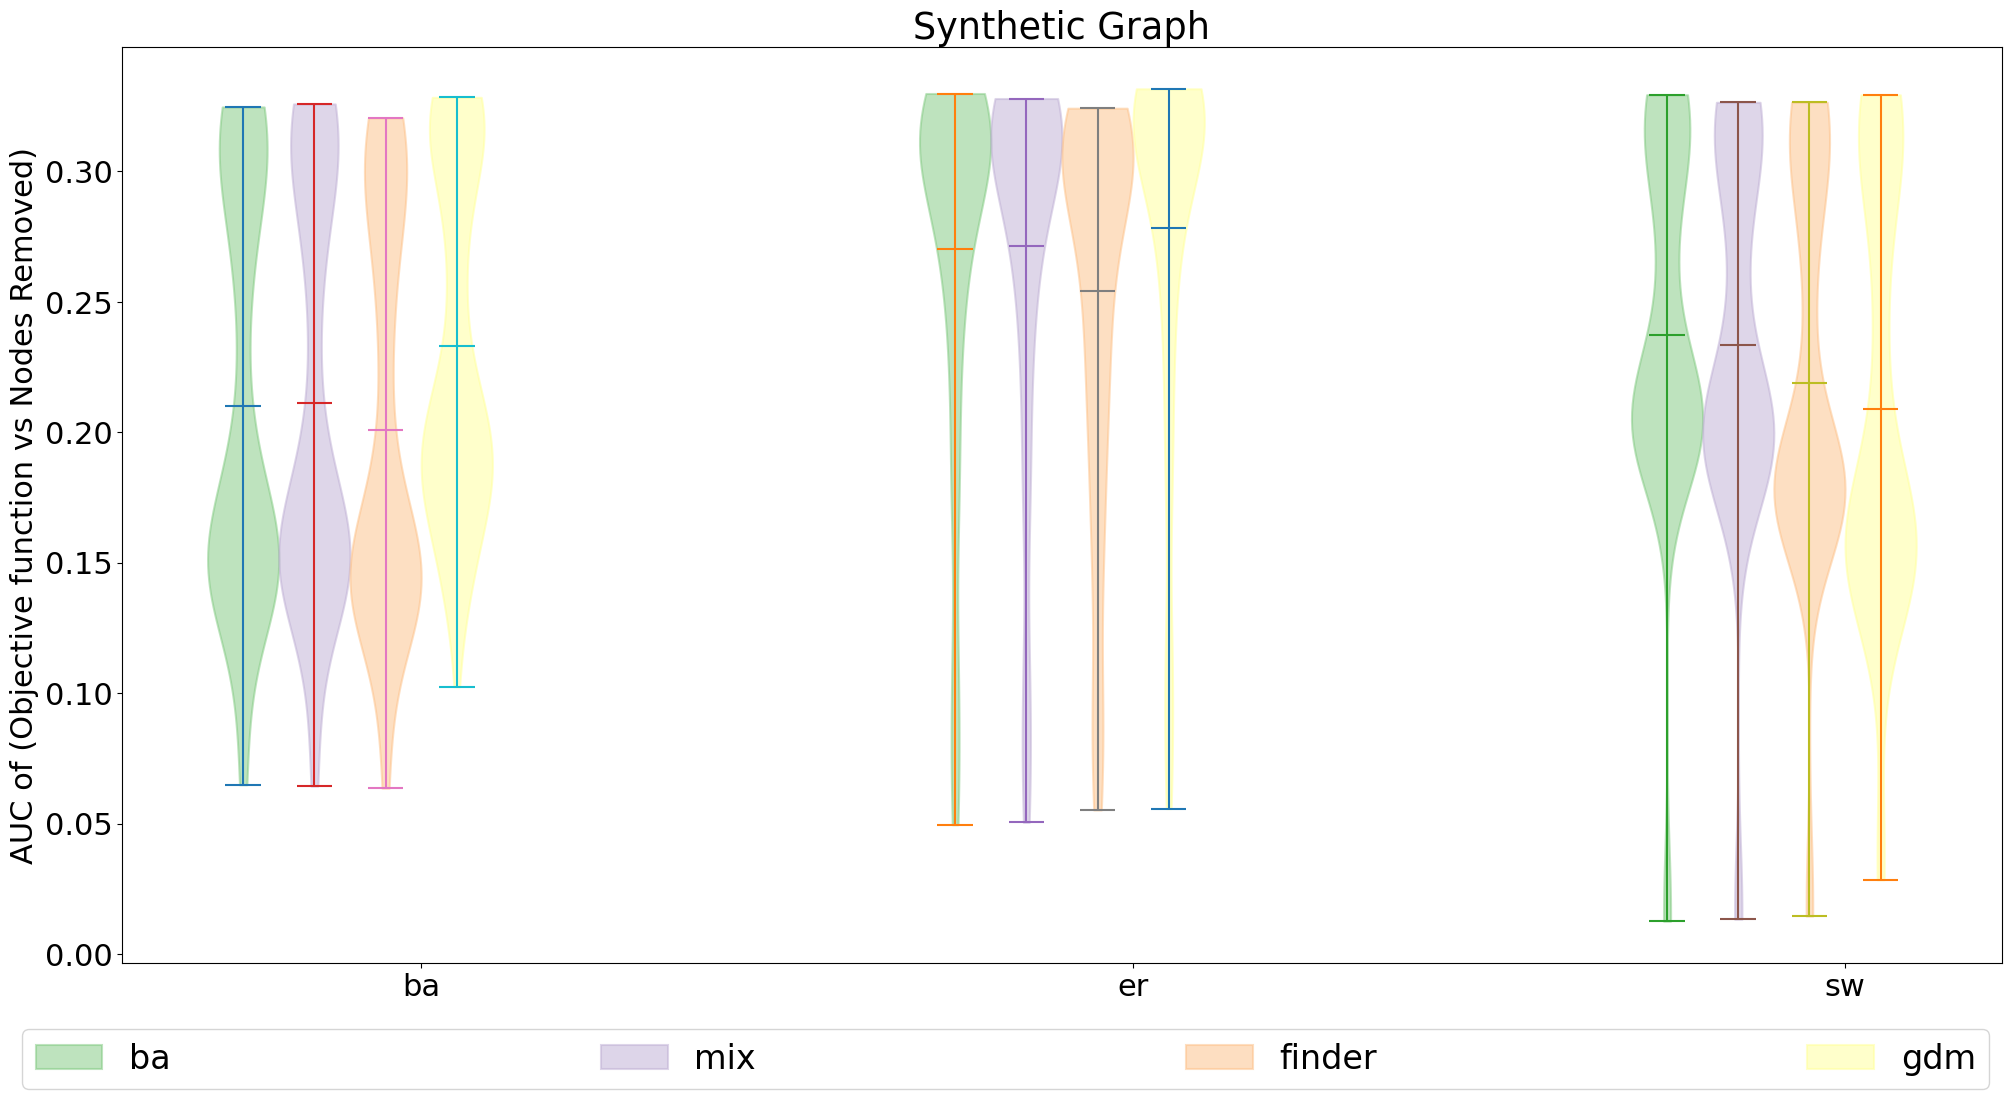

In [104]:
color_1 = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
color_2 = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
labeling = ['ba', 'mix', 'finder', 'ci','corehd']
labeling = ['ba', 'mix', 'finder','gdm']
model_name = ['ba_CN', 'mix_CN', 'finder_CN', 'ci_CN','corehd_CN']
model_name = ['ba_CN', 'mix_CN', 'finder_CN','ci_CN','corehd_new_CN']
model_name = ['ba_CN', 'mix_CN', 'finder_CN','gdm_CN']
measure = 'auc'
#measure = 'fraction'
objectiveFunction = 'CNP'
#for evaluation_method in ["result_Syn", "result_SynMotif"]:
for evaluation_method in ["result_Syn"]:
    plot_bargraph(SAVE,model_name, evaluation_method, labeling,color_1,objectiveFunction,measure)
    plot_boxplot(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    plot_boxplot_single(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    

# Maximum Number of Connected Components 

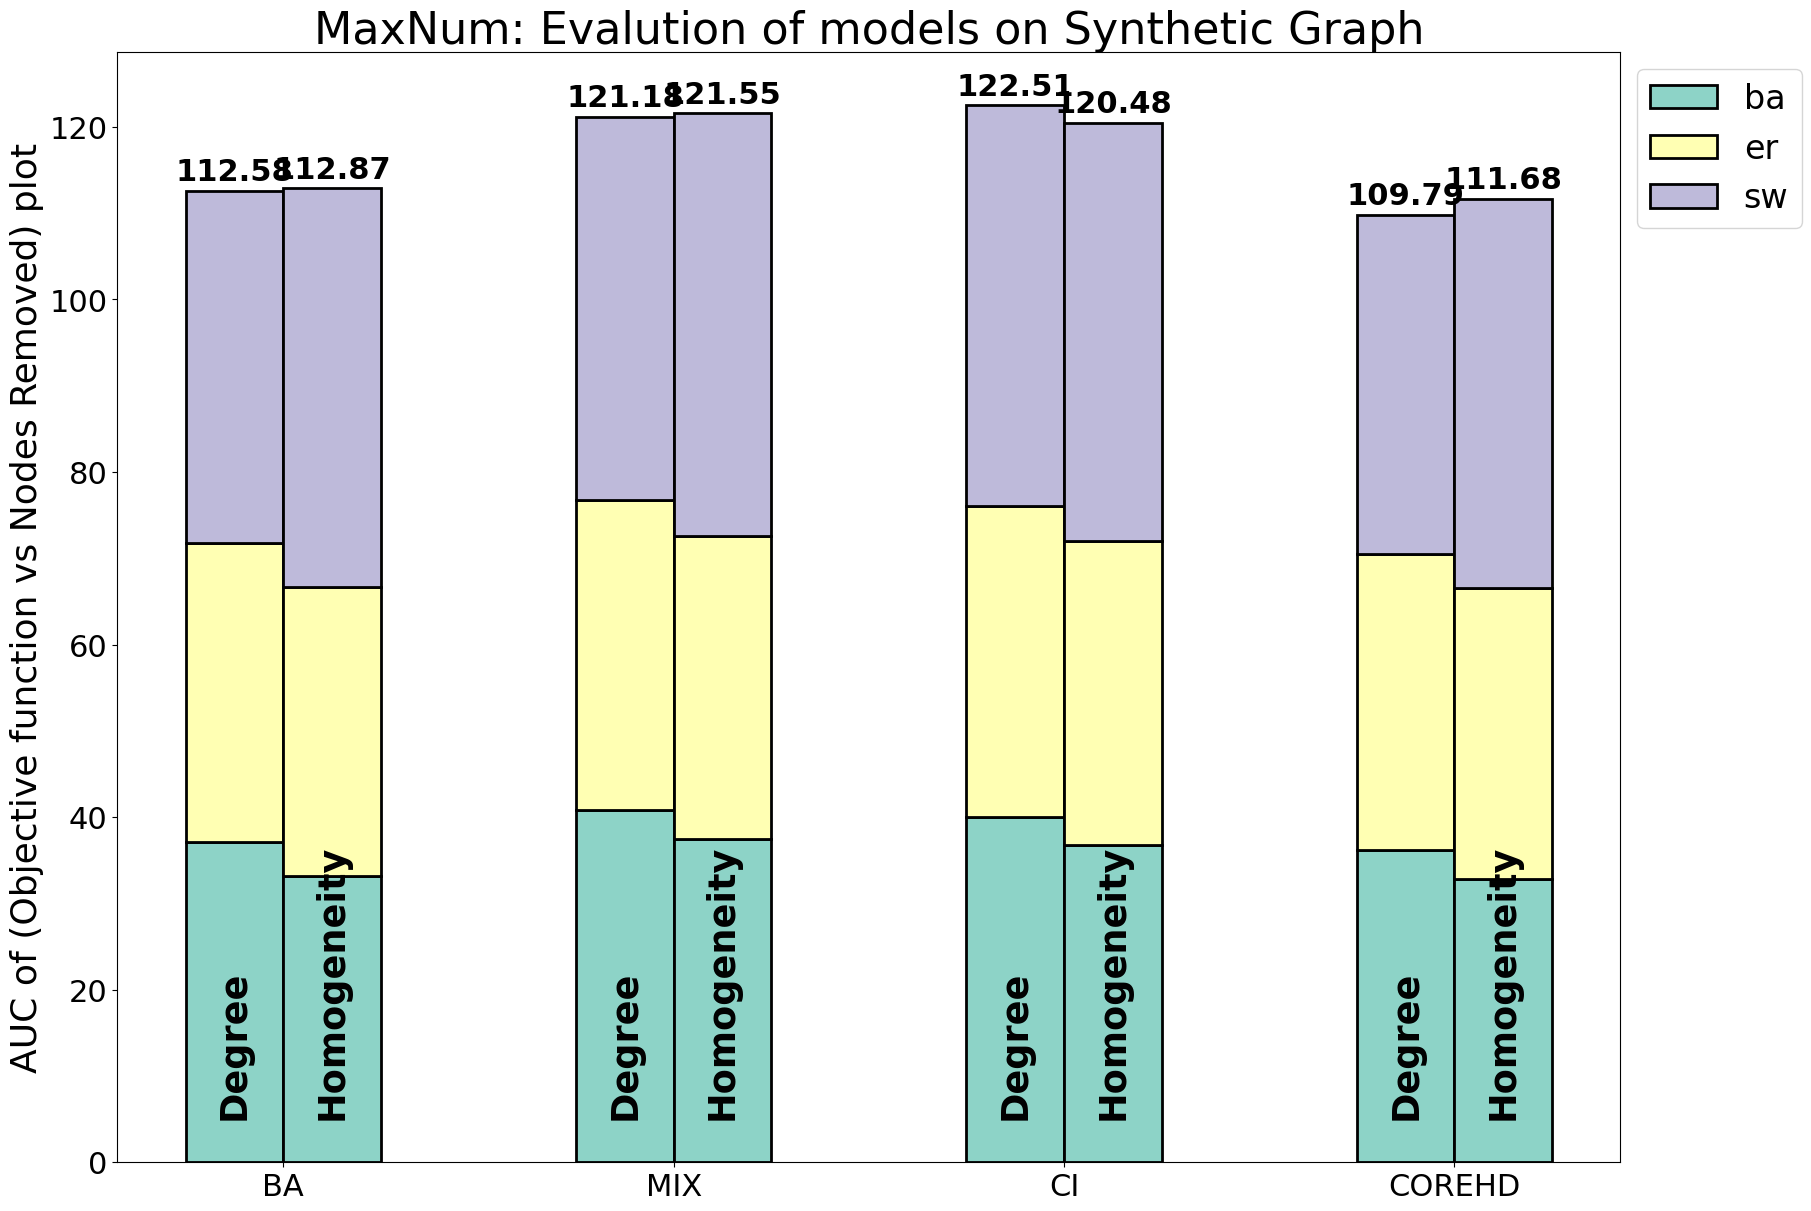

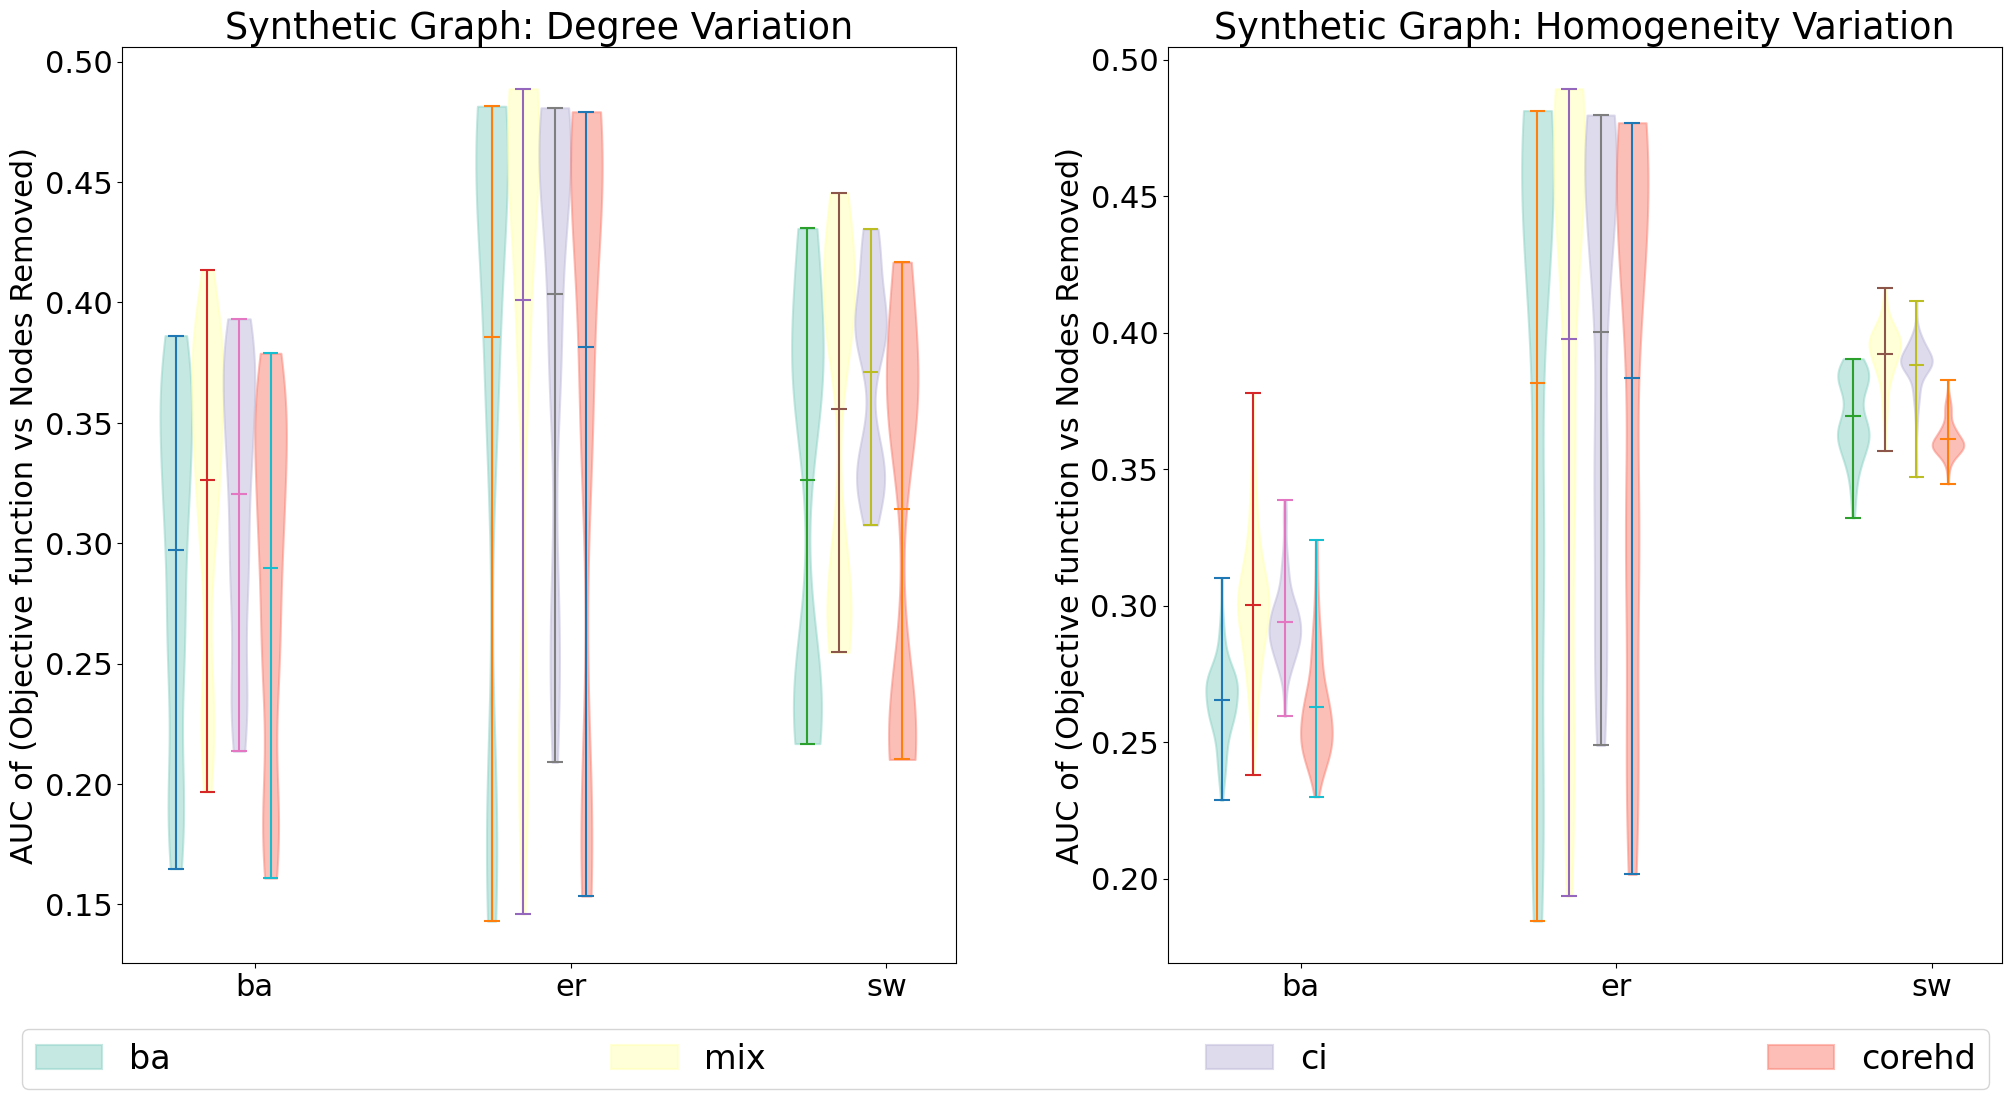

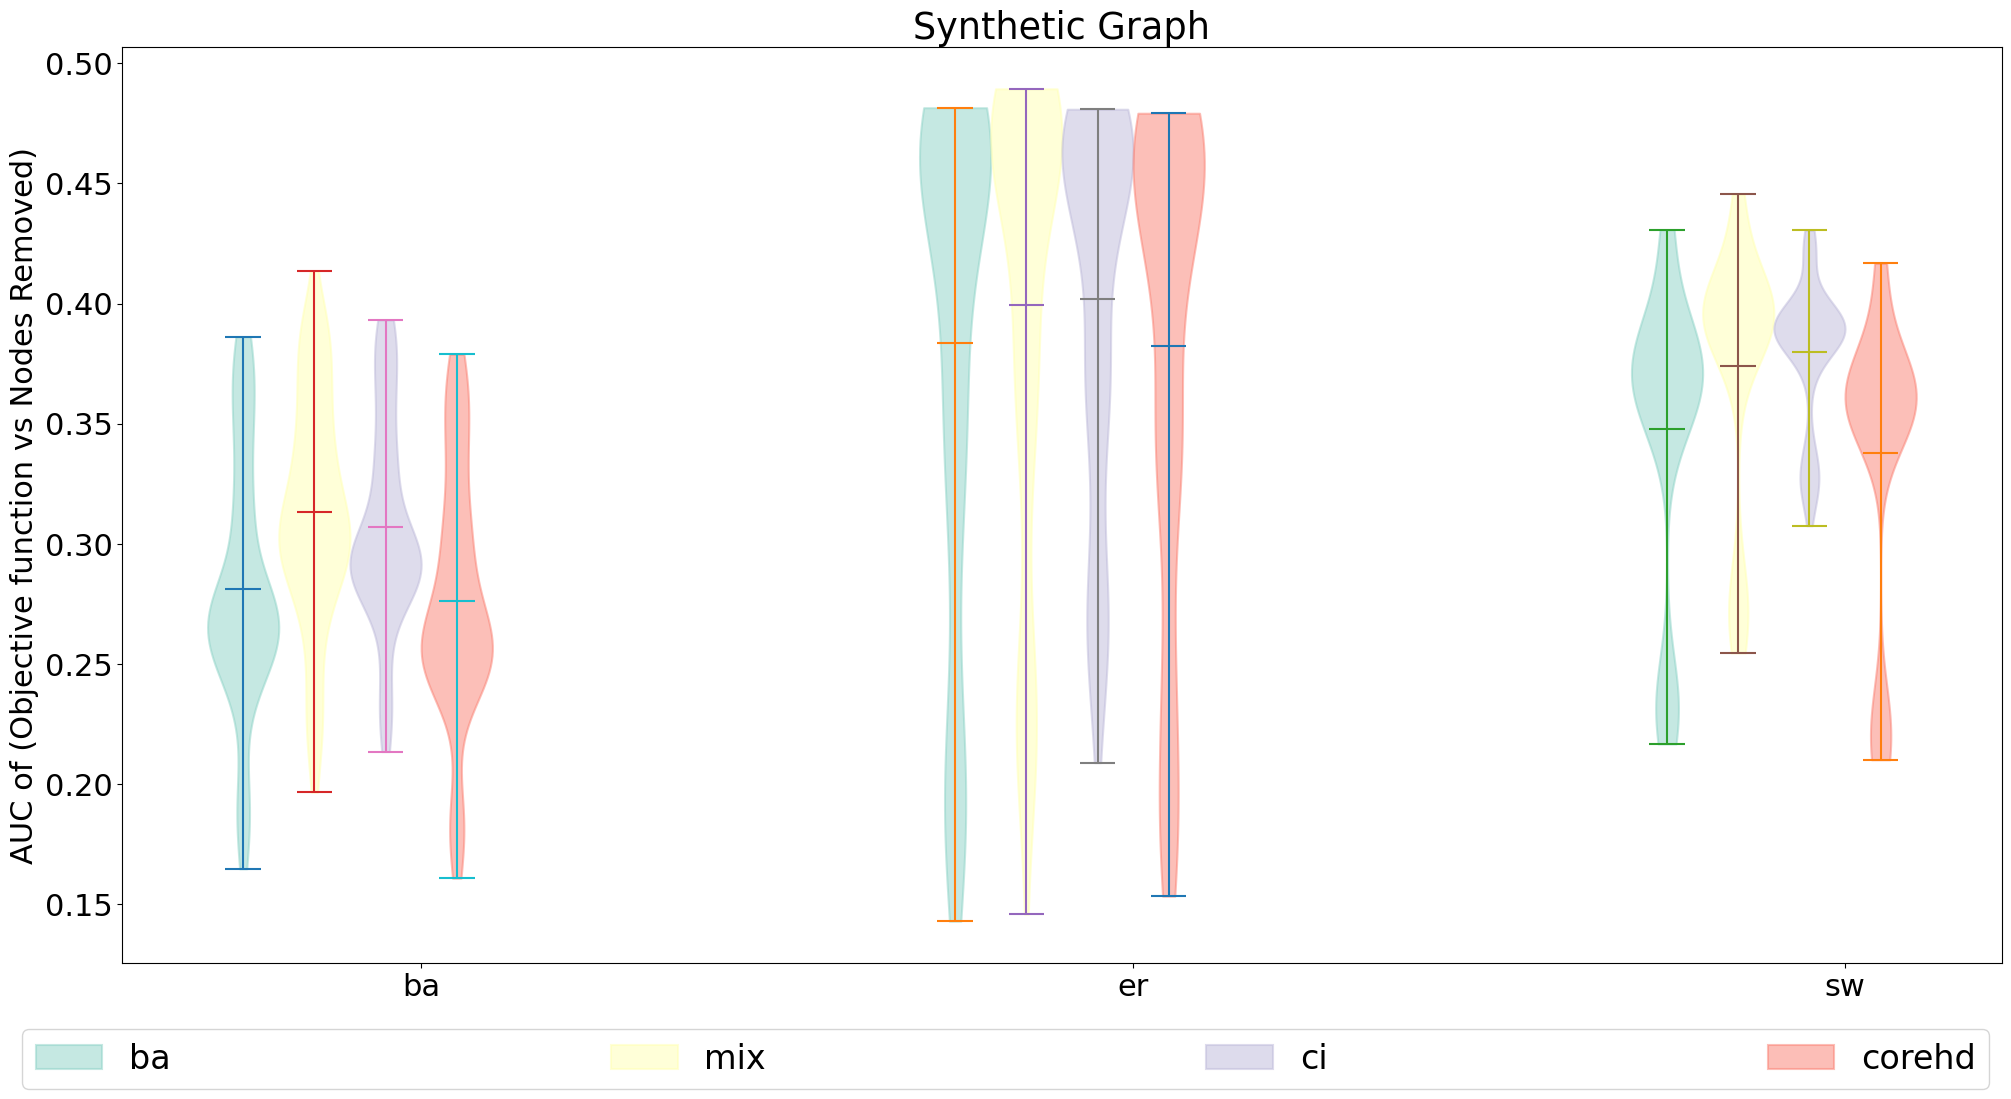

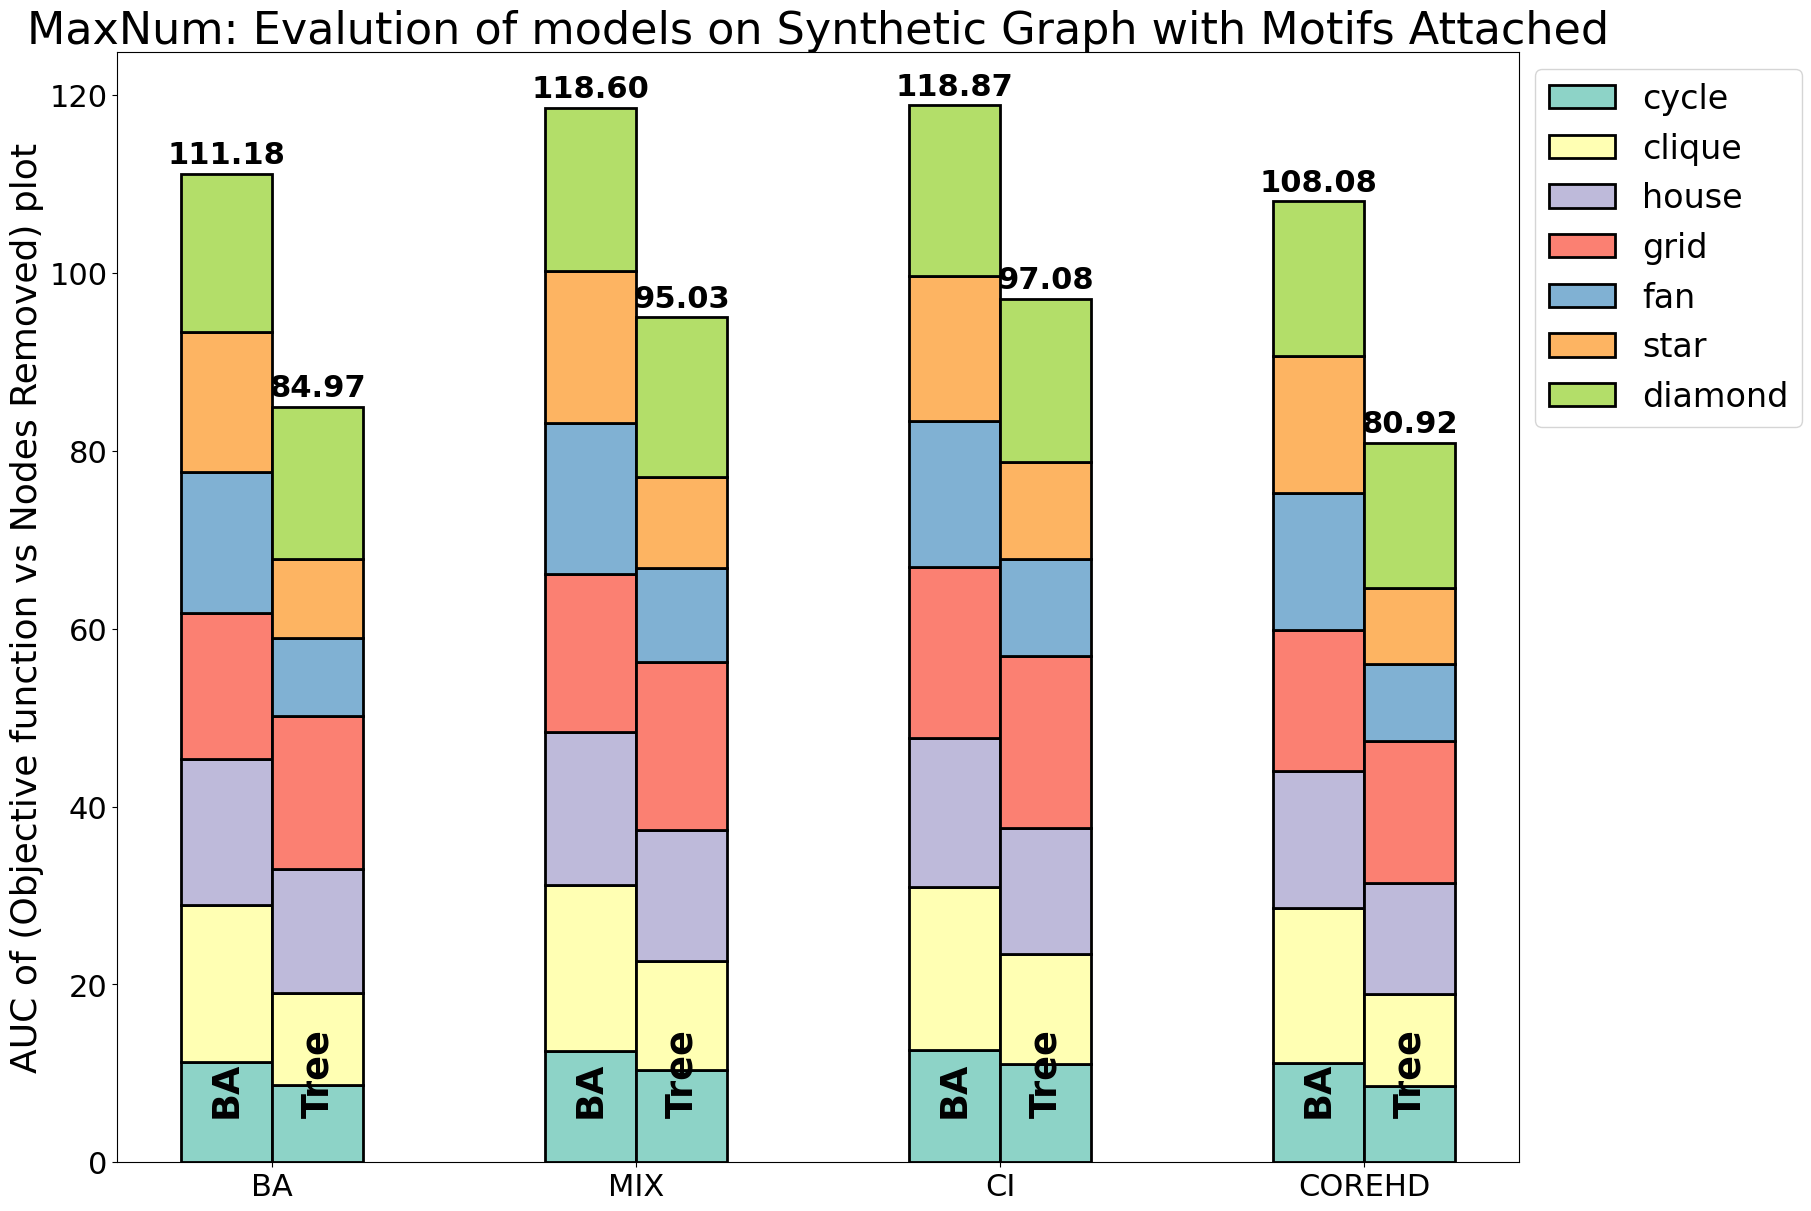

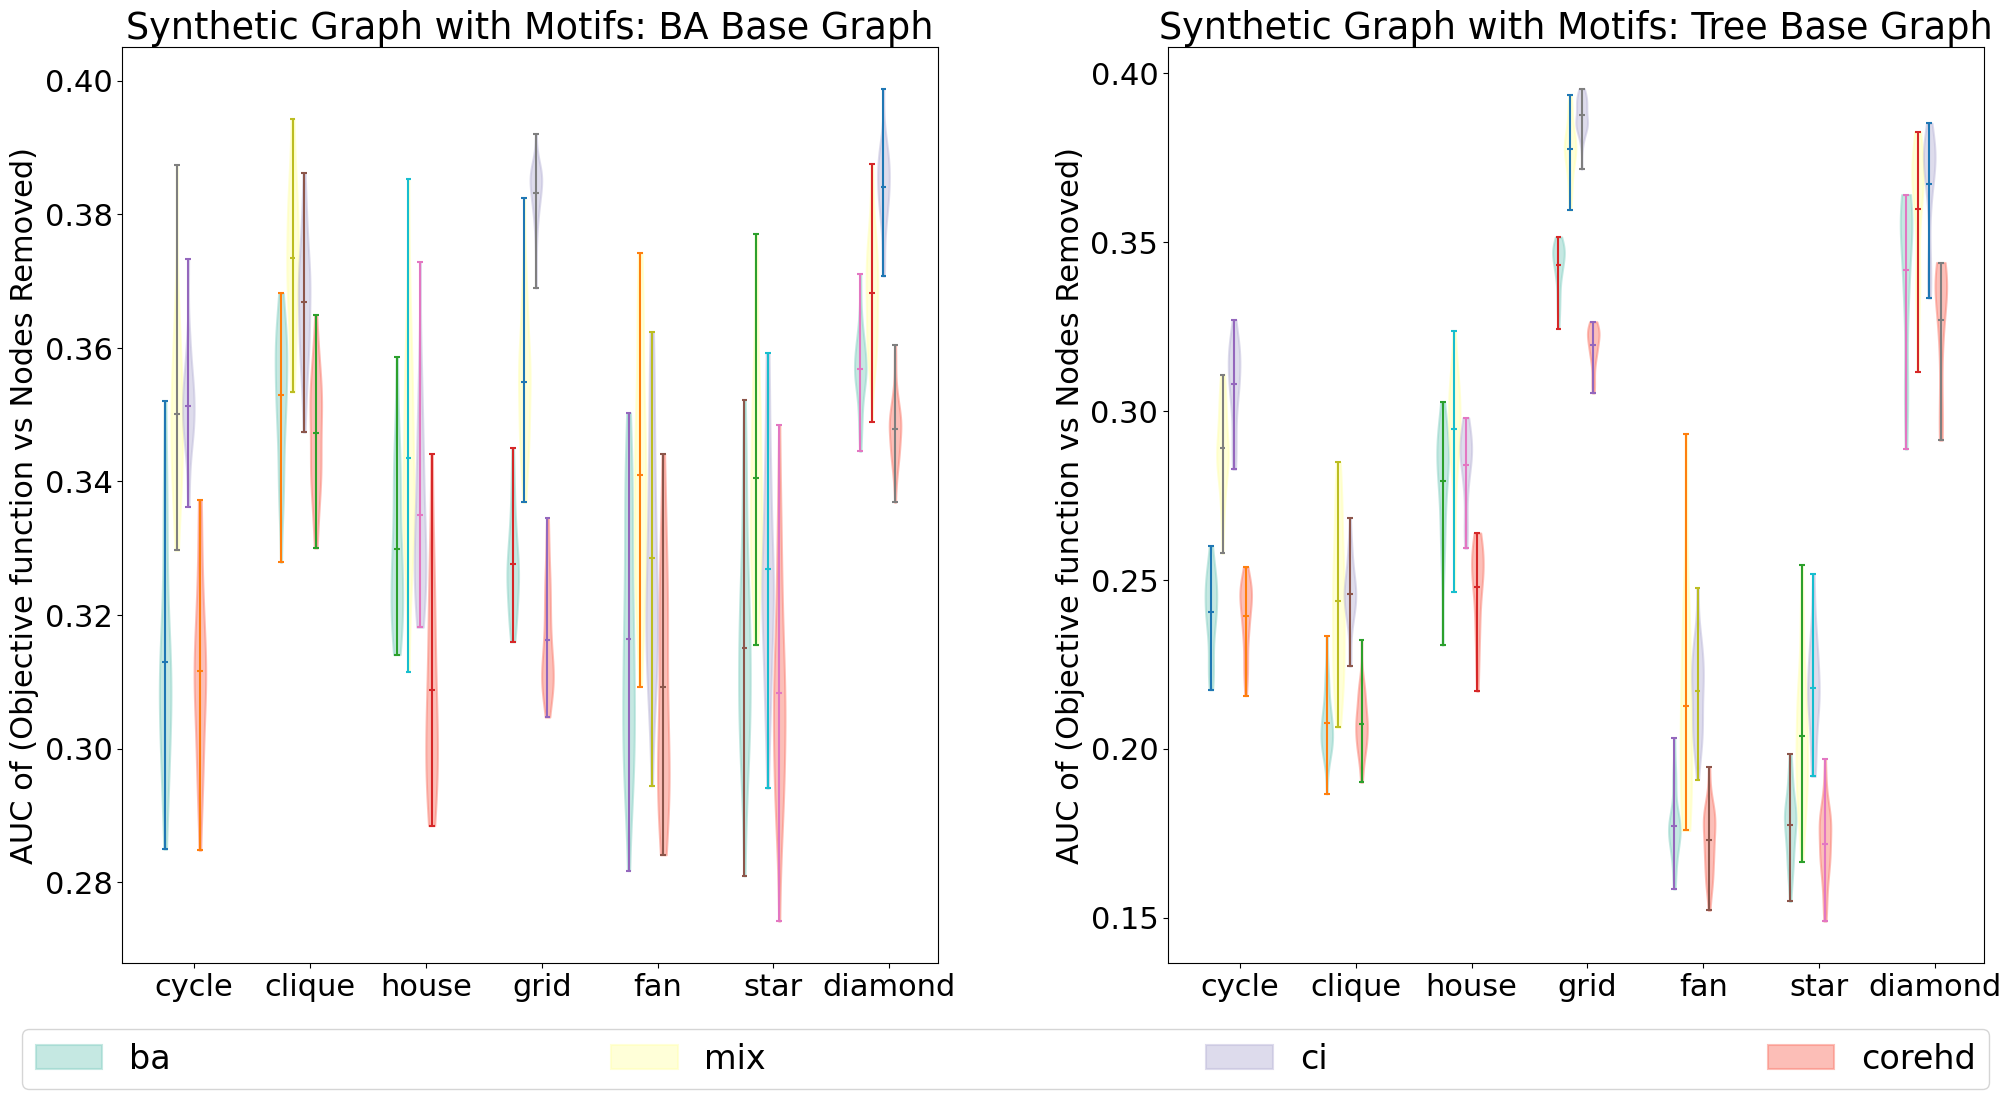

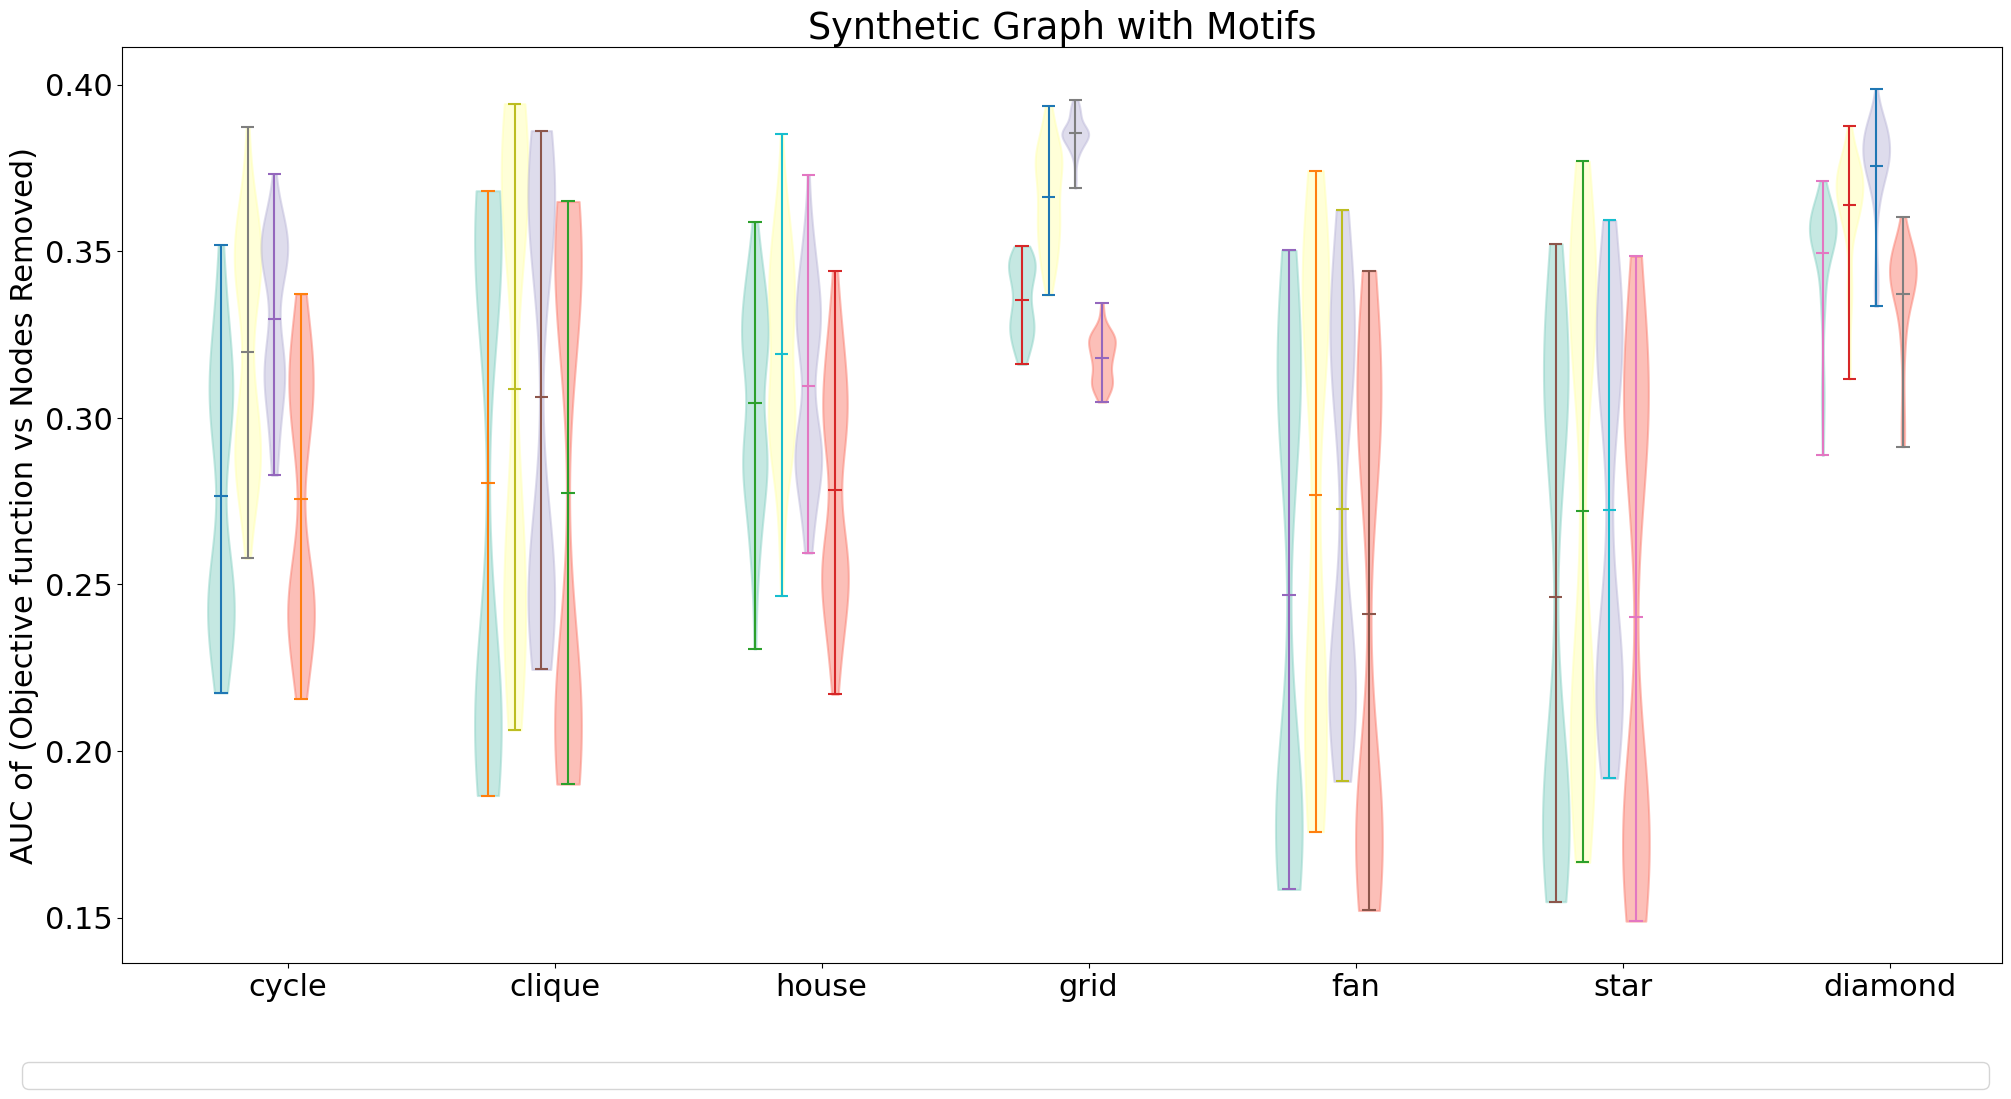

In [45]:
color_1 = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
color_2 = ['#7fc97f','#beaed4','#386cb0','#f0027f']
color_2 = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
labeling = ['ba', 'mix', 'ci','corehd']
model_name = ['ba_MaxNum', 'mix_MaxNum',  'ci_MaxNum','corehd_MaxNum']
model_name = ['ba_MaxNum', 'mix_MaxNum', 'ci_MaxNum','corehd_new_MaxNum']
measure = 'auc'
#measure = 'fraction'
objectiveFunction = 'MaxNum'
for evaluation_method in ["result_Syn", "result_SynMotif"]:
    plot_bargraph(SAVE,model_name, evaluation_method, labeling,color_1,objectiveFunction,measure)
    plot_barplot(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')
    plot_boxplot_single(SAVE,model_name,evaluation_method, labeling,color_2,objectiveFunction,measure='auc')


# Compare with Global Feature

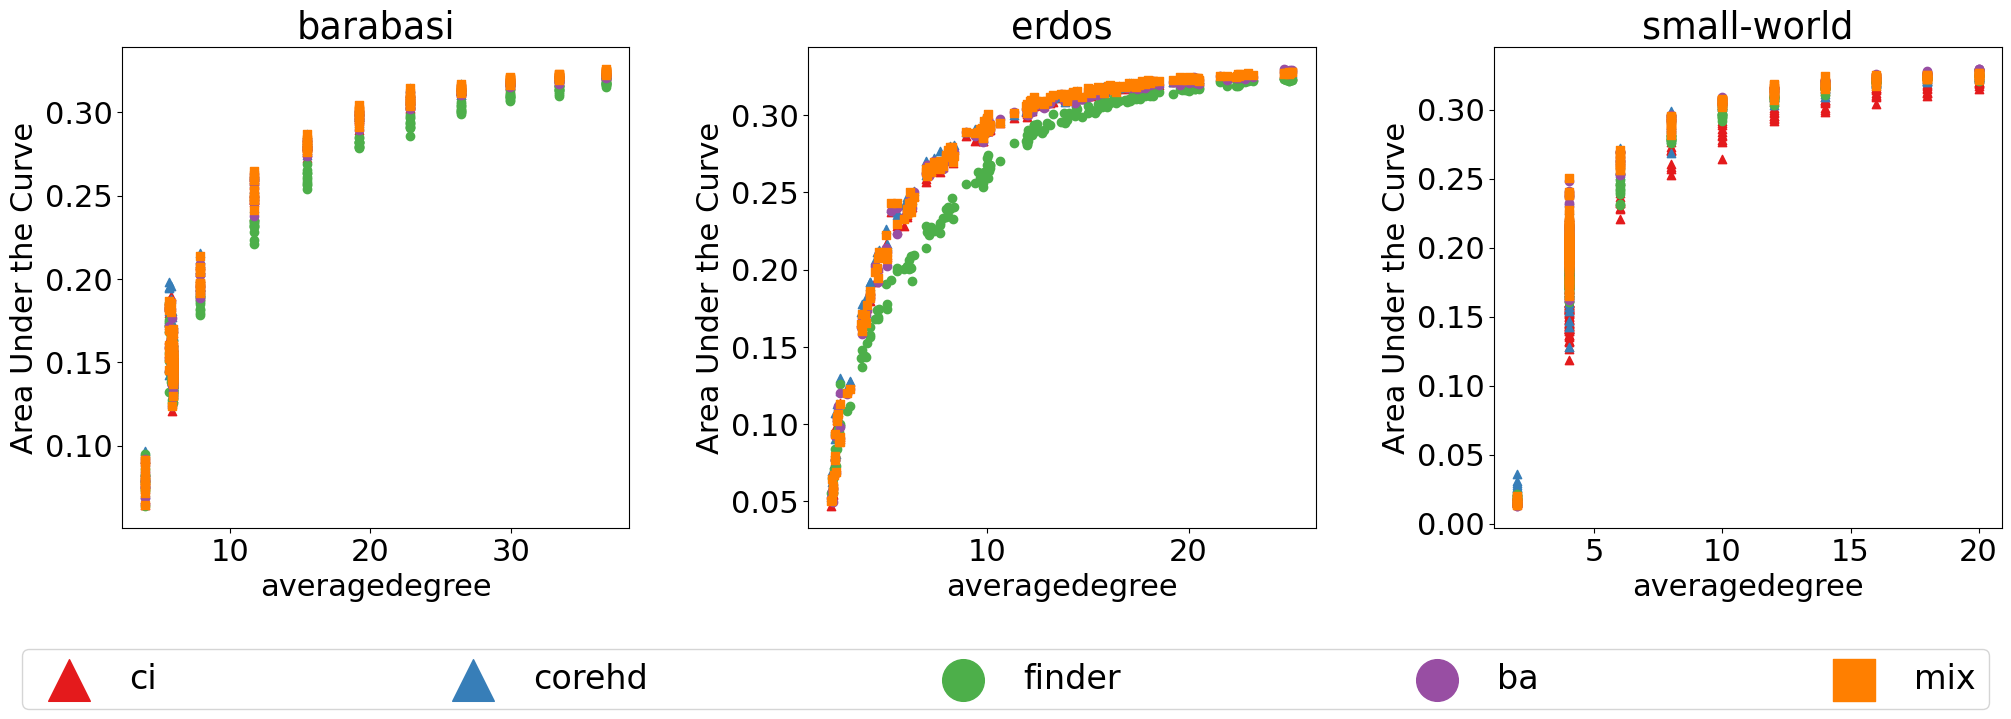

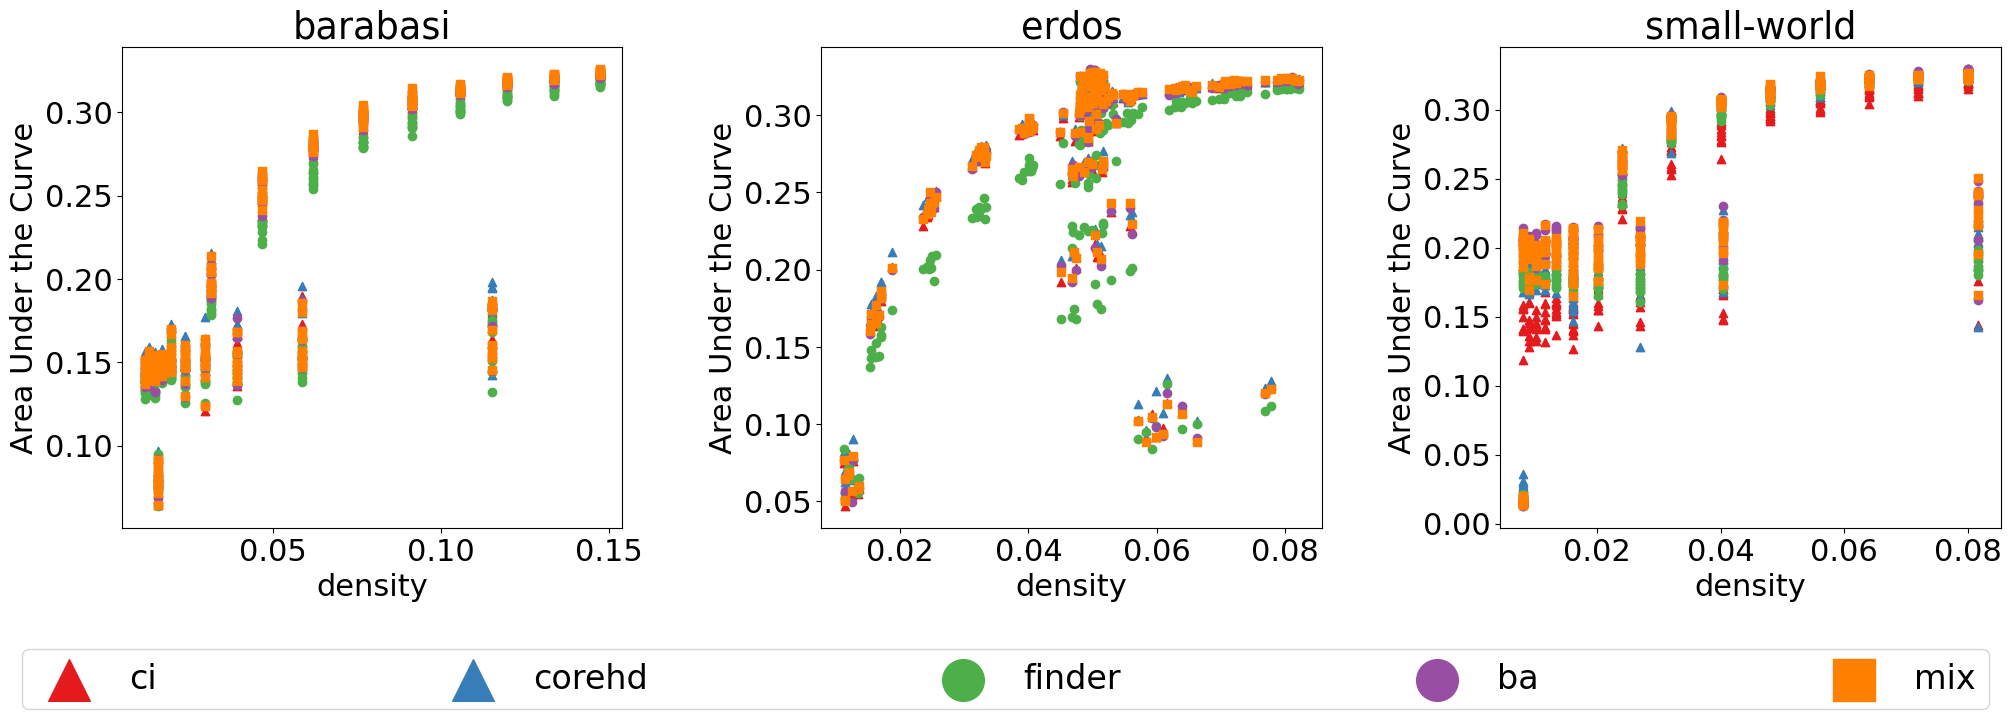

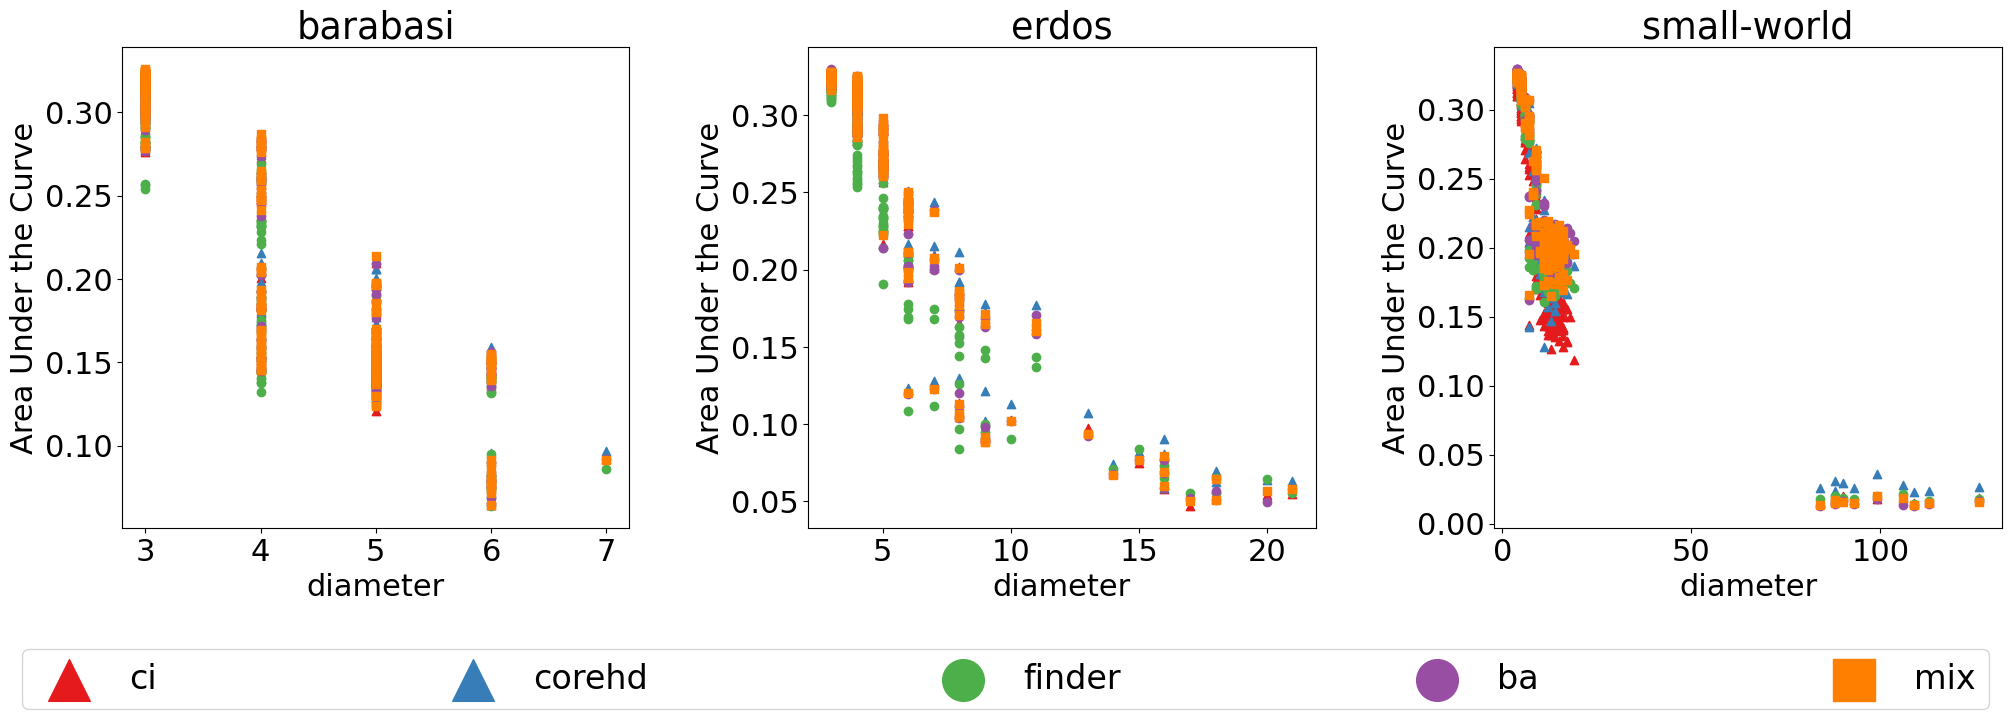

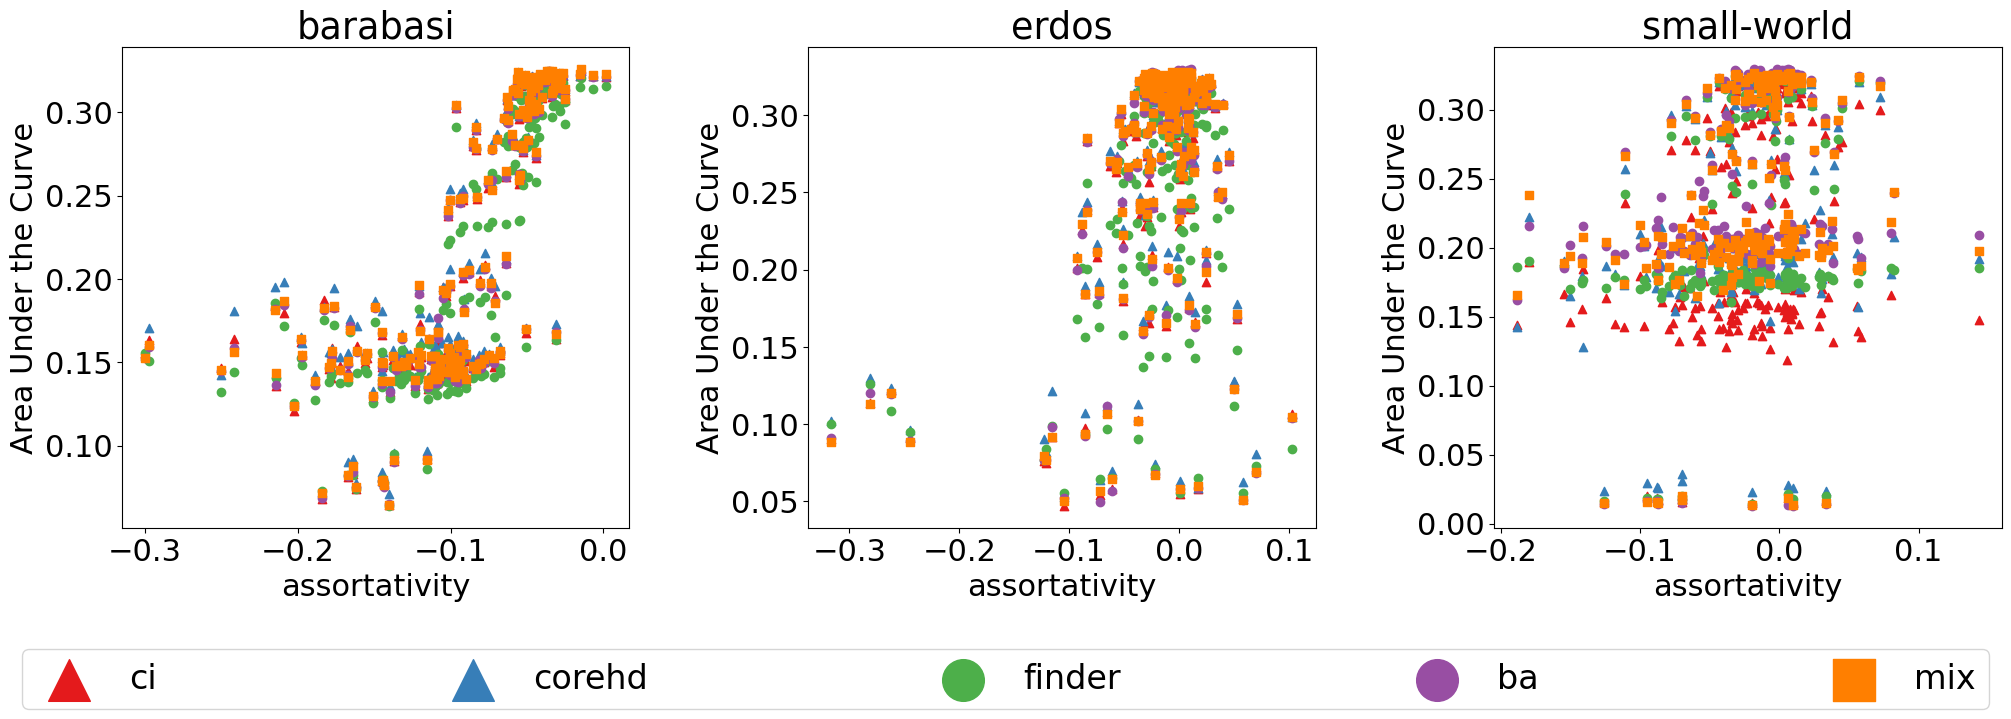

'plot_2d_feature(SAVE,featureList[0],model_name_maxnum,evalType, color_2, marker,"MaxNum")\nplot_2d_feature(SAVE,featureList[1],model_name_maxnum,evalType, color_2, marker,"MaxNum")\nplot_2d_feature(SAVE,featureList[3],model_name_maxnum,evalType, color_2, marker,"MaxNum")'

In [105]:
#%matplotlib notebook
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
def get_feature(feature_dict,evalType,featureName,fileName):
    data = []
    for f in fileName:
        data.append(feature_dict[evalType][f.split(".txt")[0]][featureName])
    return list(data)

#def plot_3d_feature(SAVE,featureList,model,method,variation,measure='auc'):
def plot_3d_feature(SAVE,featureList,model_list,method,variation,color,measure='auc'):
    getFeature = get_from_json("./Dataset/featuresNew.json")
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    font = {'weight' : 'normal',
        'size'   : 22}
    matplotlib.rc('font', **font)
    for color_code, model in enumerate(model_list):
        data = {"result":[], featureList[0]:[], featureList[1]: []}
        for method in SAVE[model]:
            result = SAVE[model][method]
            for pos,evalType in enumerate(result):
                #for pos,evalType in enumerate(['Degree']):
                for variation in (result[evalType]):
                    data["result"] = data["result"] + result[evalType][variation][measure]
                    feature0 = get_feature(getFeature,featureList[0],result[evalType][variation]["graphname"])
                    data[featureList[0]] = data[featureList[0]] + feature0
                    feature1 = get_feature(getFeature,featureList[1],result[evalType][variation]["graphname"])
                    data[featureList[1]] = data[featureList[1]] + feature1
        vertices = [list(zip(data[featureList[0]],data[featureList[1]],data["result"]))]
        ax.scatter(xs = data[featureList[0]], ys = data[featureList[1]], zs = data["result"], color=color[color_code] )
        '''poly = Poly3DCollection(vertices, alpha=0.8)
        ax.add_collection3d(poly)'''
    '''xs = data[featureList[0]]
    ys = data[featureList[1]]
    zs = data["result"] 
    ax.plot_surface(xs, ys, rv.pdf(zs), cmap="plasma")'''
    ax.set_xlabel(featureList[0])
    ax.set_ylabel(featureList[1])
    ax.set_zlabel('Area Under the Curve')
    plt.show()
def plot_2d_feature(SAVE,feature,model_list,evalList,color,marker,obj,measure='auc'):
    getFeature = get_from_json("./Dataset/featuresNew.json")
    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,6), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
    font = {'weight' : 'normal',
        'size'   : 22}
    matplotlib.rc('font', **font)
    handles = []
    for pos, variation in enumerate(evalList):
        for color_code, model in enumerate(model_list):
            data = {"result":[], feature:[]}
            for method in SAVE[model]:
                if method != "result_Syn":
                        continue
                result = SAVE[model][method]
                for evalType in result:
                    data["result"] = data["result"] + result[evalType][variation][measure]
                    feature0 = get_feature(getFeature,evalType.lower(),feature,result[evalType][variation]["graphname"])
                    data[feature] = data[feature] + feature0
            sc = ax[pos].scatter(x = data[feature], y = data["result"], color=color[color_code], marker=marker[color_code], label = model.split("_")[0])
            if pos == 0:
                    #handles.append(bp["boxes"][0])
                    handles.append(sc)
        ax[pos].set_xlabel(feature)
        ax[pos].set_ylabel("Area Under the Curve")
        ax[pos].set_title(variation)
    #plt.legend(loc="upper left", fontsize=24, bbox_to_anchor=(1,1))
    fig.legend(handles, [m.split("_")[0] for m in model_list],loc = "lower left", bbox_to_anchor=(0, -0.2,1 ,1 ),markerscale=5,  fontsize=24, mode = "expand", ncol = len(model_list))
    plt.savefig("./Figure/Feature/Performance Feature/"+obj+"_"+feature+".png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
                    
featureList= ["averagedegree","density","heterogeneity","diameter","assortativity","modularity","global_efficiency"]
model = "mix"
color_2 = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
#color_2 = ['#e41a1c','#ff7f00','#ffff33']
marker = ['^','^','o','o','s','s']
#marker = ['^','s','s']
model_name_cnp = [ 'ci_CN','corehd_new_CN','finder_CN','ba_CN', 'mix_CN']
model_name_maxnum = ['ba_MaxNum', 'mix_MaxNum', 'ci_MaxNum','corehd_new_MaxNum']
model_name = ['gdm','ci','corehd_new','finder','ba', 'mix', ]
evalType =  ['barabasi', 'erdos','small-world']
#plot_3d_feature(SAVE,featureList,model,"result_Syn",variation, color_2)
#plot_3d_feature(SAVE,featureList,model_name,"result_Syn",variation, color_2)
'''plot_2d_feature(SAVE,featureList[0],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[1],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[2],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[3],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[4],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[5],model_name,evalType, color_2, marker,"MinMax")
plot_2d_feature(SAVE,featureList[6],model_name,evalType, color_2, marker,"MinMax")'''
#plot_2d_feature(SAVE,featureList[4],model_name, color_2, marker)
plot_2d_feature(SAVE,featureList[0],model_name_cnp,evalType, color_2, marker,"CNP")
plot_2d_feature(SAVE,featureList[1],model_name_cnp,evalType, color_2, marker,"CNP")
plot_2d_feature(SAVE,featureList[3],model_name_cnp,evalType, color_2, marker,"CNP")
plot_2d_feature(SAVE,featureList[4],model_name_cnp,evalType, color_2, marker,"CNP")

'''plot_2d_feature(SAVE,featureList[0],model_name_maxnum,evalType, color_2, marker,"MaxNum")
plot_2d_feature(SAVE,featureList[1],model_name_maxnum,evalType, color_2, marker,"MaxNum")
plot_2d_feature(SAVE,featureList[3],model_name_maxnum,evalType, color_2, marker,"MaxNum")'''